EXPLORACION DE DATOS

Proyecto 03 - Series de Tiempo
Dataset: Flujo Vehicular por Unidades de Peaje AUSA
Recuerda descargar el dataset de aquí. Deberás descargar - al menos para comenzar - los años 2017, 2018 y 2019.

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

Importante: Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

Exploración de datos
Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

Componentes de la serie
1-Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
2-¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. Pista: primer semestre 2019.


Predicción a Futuro
Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019.

1-Haz todas las transformaciones de datos que consideres necesarias. Justifica.
2-Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
3-Elige un modelo benchmark y compara tus resultados con este modelo.
4-Optimiza los hiperparámetros de tu modelo.
5-Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
6-Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
7-Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?
Para pensar, investigar y, opcionalmente, implementar
1-¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
2-¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
3-¿Hay algo que te gustaría investigar o probar?





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
sns.set()

import scipy as sp
from scipy import stats
%matplotlib inline
from sklearn.impute import SimpleImputer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import datetime
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
import sklearn.metrics as metrics
#auto correlacion
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#descomposicion de serie
import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa import stattools
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
#Prophet
#from prophet import Prophet
#from prophet.plot import plot_plotly, plot_components_plotly

import matplotlib
#Importamos las librerías para poder trabajar

In [3]:
pip install --upgrade patsy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [5]:
import csv

In [6]:
data_2019 = pd.read_csv(r"C:\Users\Cande\Desktop\DOCUMENTACION PARA ENVIAR A GABRIEL\DATASCIENCE\flujo-vehicular-2019.csv", sep =',')
data_2019.info()
# Nos muestra como esta compuesto el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


In [7]:
data_2019.head() 
#Nos muestra las primeras 5 filas de nuestro dataset

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [8]:
data_2019.tail()
#Nos muestra las últimas 5 filas del dataset

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
812148,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,TELEPASE,4
812150,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2019,2019-12-31,23,0,Martes,Sarmiento,Provincia,Liviano,NO COBRADO,7
812152,2019,2019-12-31,23,0,Martes,Sarmiento,Provincia,Liviano,TELEPASE,7


In [9]:
data_2018 = pd.read_csv(r"C:\Users\Cande\Desktop\DOCUMENTACION PARA ENVIAR A GABRIEL\DATASCIENCE\flujo-vehicular-2018.csv", sep =',')
data_2018.info()
#Nos muestra como esta compuesto el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1048575 non-null  int64 
 1   fecha           1048575 non-null  object
 2   hora_inicio     1048575 non-null  int64 
 3   hora_fin        1048575 non-null  int64 
 4   dia             1048575 non-null  object
 5   estacion        1048575 non-null  object
 6   sentido         1048575 non-null  object
 7   tipo_vehiculo   1048575 non-null  object
 8   forma_pago      1048575 non-null  object
 9   cantidad_pasos  1048575 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 80.0+ MB


In [10]:
data_2018.head()
#Nos muestra las primeras 5 filas de nuestro dataset

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [11]:
data_2018.tail()
#Nos muestra las últimas 5 filas del dataset

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
1048570,2018,2018-10-07,0,1,Domingo,Alberdi,Provincia,Liviano,EXENTO,2
1048571,2018,2018-10-07,0,1,Domingo,Alberdi,Provincia,Liviano,EFECTIVO,129
1048572,2018,2018-10-07,0,1,Domingo,Alberdi,Provincia,Liviano,TARJETA DISCAPACIDAD,3
1048573,2018,2018-10-07,0,1,Domingo,Alberdi,Provincia,Liviano,INFRACCION,1
1048574,2018,2018-10-07,0,1,Domingo,Alberdi,Provincia,Liviano,TELEPASE,90


In [12]:
data_2017 = pd.read_csv(r"C:\Users\Cande\Desktop\DOCUMENTACION PARA ENVIAR A GABRIEL\DATASCIENCE\flujo-vehicular-2017.csv", sep =',')
data_2017.info()
#Nos muestra como esta compuesto el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1048575 non-null  int64 
 1   fecha           1048575 non-null  object
 2   hora_inicio     1048575 non-null  int64 
 3   hora_fin        1048575 non-null  int64 
 4   dia             1048575 non-null  object
 5   estacion        1048575 non-null  object
 6   sentido         1048575 non-null  object
 7   tipo_vehiculo   1048575 non-null  object
 8   forma_pago      1048575 non-null  object
 9   cantidad_pasos  1048575 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 80.0+ MB


In [13]:
data_2017.head()
#Nos muestra las primeras 5 filas de nuestro dataset

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


In [14]:
data_2017.tail()
#Nos muestra las últimas 5 filas del dataset

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
1048570,2017,2017-10-07,22,23,Sábado,Alberdi,Centro,Pesado,EFECTIVO,4
1048571,2017,2017-10-07,22,23,Sábado,Alberdi,Centro,Pesado,TELEPASE,2
1048572,2017,2017-10-07,23,0,Sábado,Alberdi,Centro,Liviano,EXENTO,2
1048573,2017,2017-10-07,23,0,Sábado,Alberdi,Centro,Liviano,EFECTIVO,66
1048574,2017,2017-10-07,23,0,Sábado,Alberdi,Centro,Liviano,TARJETA DISCAPACIDAD,4


Investigamos ahora que valores toman las columnas estacion, sentido, tipo_vehiculo y forma_pago

In [15]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())
#Nos muestra los nombres de las estaciones por año la diferencia que se puede observar es que en el año 2019 esta la "PDB y Dellepine" y en los años 2018 y 2017 esta separado Dellepiane Centro y Liniers y no esta PDB

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [16]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())
#Nos da el nombre de los sentidos

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [17]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())
#Nos muestra los tipos de vehículo que existen en el dataset

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [18]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())
#Nos muestra las distintas formas de pago que existen en el dataset de cada año

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO']


Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:
Periodo: año del dataset

Fecha: año dia mes

hora_inicio hora de inicio de la cuenta de vehiculos 

hora_fin hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

dia: dia de la semana

estacion: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

sentido: Centro o Provincia

tipo_vehiculo: Liviano o Pesado

forma_pago: Hay varias y van variando entre los años.

cantidad_pasos: Cantidad de vehiculos


In [19]:
data_2019.isna().sum()
#nos da la sumatoria de valores faltantes por columna, en este caso no hay valores faltantes

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64

In [20]:
data_2018.isna().sum()
#nos da la sumatoria de valores faltantes por columna, en este caso no hay valores faltantes

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64

In [21]:
data_2017.isna().sum()
#nos da la sumatoria de valores faltantes por columna, en este caso no hay valores faltantes

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64

In [22]:
#unimos los dataset de trabajo
dataset = pd.concat([data_2019, data_2018, data_2017])
#union en arreglo para graficos
datasets=[data_2017,data_2018,data_2019] #parafunciones

In [23]:
def pareto_cantidad_pasos(column:str,pareto_line=True,figsize_g=(16,8),grid=True):

    plt.figure(figsize=figsize_g)
    for idx,dataset in enumerate(datasets):
        conteo_estacion = dataset.groupby(by=column).agg('sum')[['cantidad_pasos']].sort_values(by='cantidad_pasos',ascending=False)          
        conteo_estacion["cumpercentage"] = conteo_estacion['cantidad_pasos'].cumsum()/conteo_estacion['cantidad_pasos'].sum()*100
        
        plt.subplot(2,2,idx+1)
        conteo_bar=sns.barplot(x=conteo_estacion.index,y='cantidad_pasos',data=conteo_estacion)
       
        plt.xticks(rotation=45,ha='right')
        if pareto_line==True:
            ax2=plt.twinx() #auto escalado de la figura
            ax2.plot(conteo_estacion.index,conteo_estacion["cumpercentage"],color="#00ff54",marker='D',ms=7)
            ax2.yaxis.set_major_formatter(PercentFormatter())     
            ax2.tick_params(axis="y", colors="#ff5400")
        for p in conteo_bar.patches: 
            conteo_bar.annotate(format(p.get_height(), ',.0f'), 
                                (p.get_x() + p.get_width() / 2., p.get_height()), 
                                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        plt.title(f'{2017+idx}',fontweight='bold')   
        sns.despine()
        if grid == True:
            plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

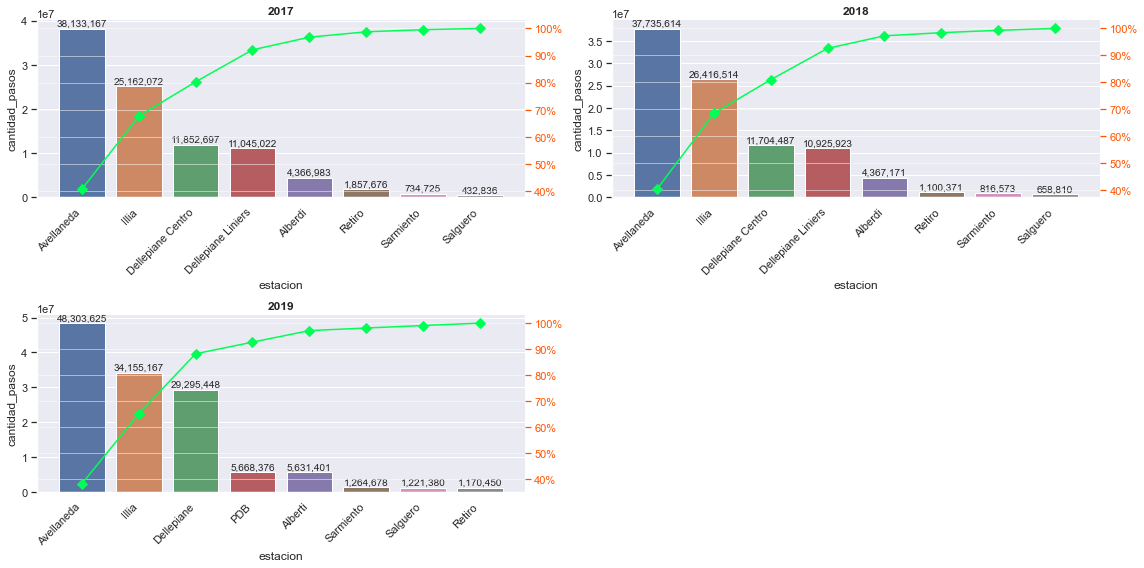

In [24]:
pareto_cantidad_pasos('estacion')

En todos los años analizados 2017, 2018 y 2019 , las estaciones que tienen más vehículos son Avellaneda, Illia, Dellepiane. En el año 2019 la estación Dellepane Centro tiene un mayor porcetaje de vehículos comprarado con los otros años (2017 y 2018) debido  que esta unida con la estación centro.


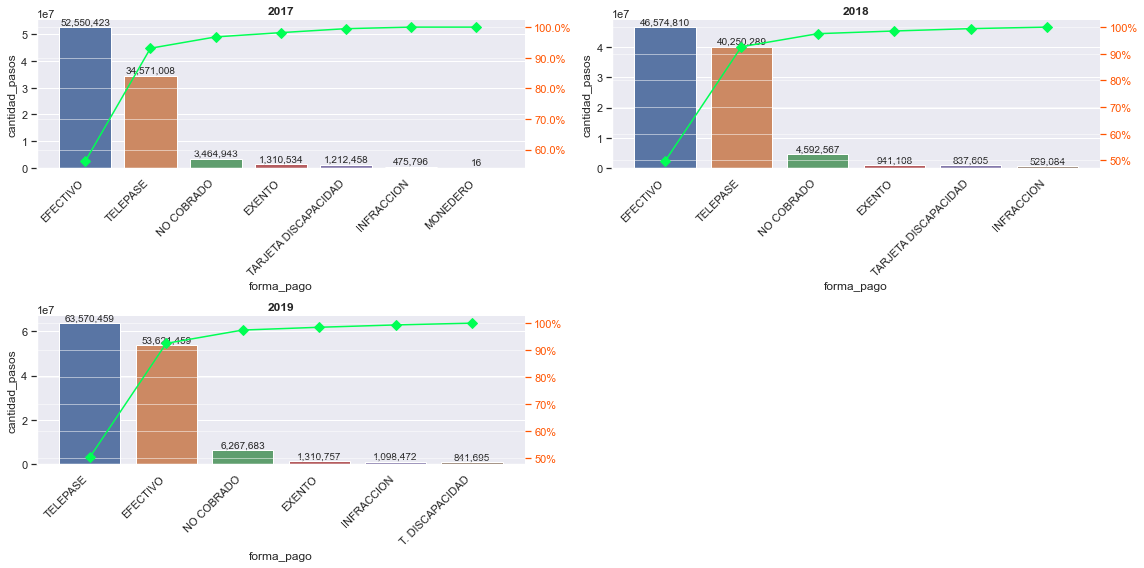

In [25]:
pareto_cantidad_pasos(column='forma_pago')

 Se puede observar que en los años 2017 y 2018 la forma más comun de pago era el efectivo y en el año 2019 gana el Telepase y luego le sigue el efectivo.

Vamos a estar trabajando con la estación Illia y la forma de pago Efectivo

In [26]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]
#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

In [27]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [28]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 

In [29]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192731 entries, 0 to 192730
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   dia             192731 non-null  object        
 1   sentido         192731 non-null  object        
 2   tipo_vehiculo   192731 non-null  object        
 3   cantidad_pasos  192731 non-null  int64         
 4   fecha           192731 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 7.4+ MB


In [31]:
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Centro,Pesado,1,2017-01-01
1,Domingo,Centro,Pesado,21,2017-01-01
2,Domingo,Centro,Pesado,10,2017-01-01
3,Domingo,Centro,Pesado,1,2017-01-01
4,Domingo,Centro,Liviano,857,2017-01-01


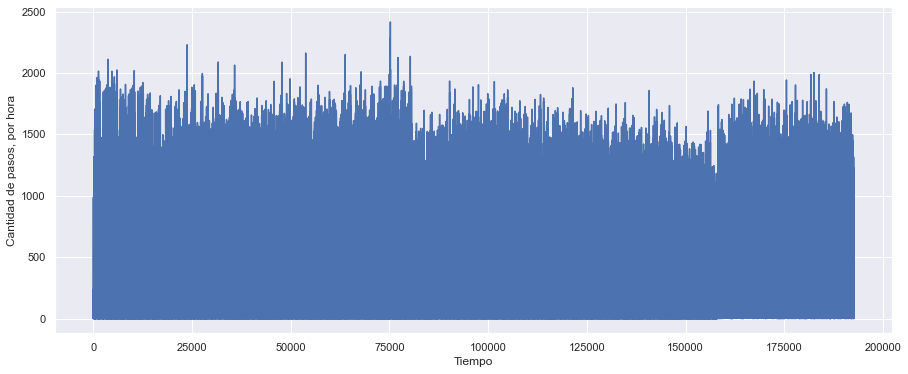

In [32]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.index, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos, por hora')
plt.show()

In [33]:
dataset = dataset.set_index('fecha')

In [34]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


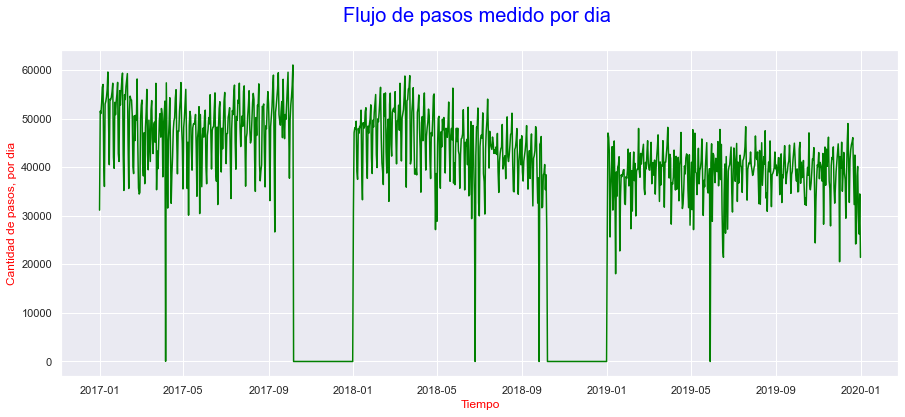

In [35]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos,color='green')
plt.title("Flujo de pasos medido por dia \n", color= 'blue', fontsize= 20)
plt.xlabel('Tiempo', color='red')
plt.ylabel('Cantidad de pasos, por dia',color='red' )
plt.show()

Se puede observar que ha días con 0 pasos

In [36]:
semanal = dataset.resample('W').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


In [37]:
mensual = dataset.resample('M').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


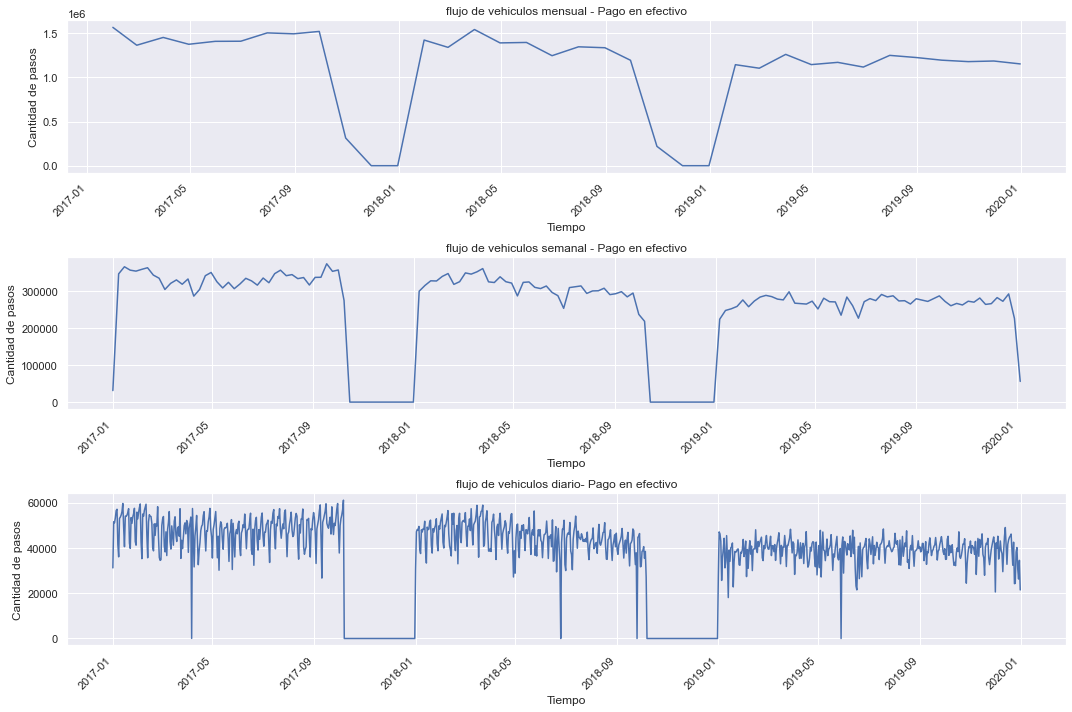

In [38]:
plt.figure(figsize = (15,10))

plt.subplot(3,1,1)
plt.title('flujo de vehiculos mensual - Pago en efectivo') 
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.xticks(rotation=45,ha='right')

plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')

plt.subplot(3,1,2)
plt.title('flujo de vehiculos semanal - Pago en efectivo') 
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xticks(rotation=45,ha='right')

plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')


plt.subplot(3,1,3)
plt.title('flujo de vehiculos diario- Pago en efectivo') 
plt.plot(diario.index, diario.cantidad_pasos)
plt.xticks(rotation=45,ha='right')

plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')


plt.tight_layout()
plt.show()

Se puede observar el flujo de vehículos que pagaron en efectivo en la frecuencia mensual, semnal y diaria de todos los años.

PRUEBA

In [39]:
dataset_ch=dataset.copy()
dataset_ch['date_check'] = dataset_ch.index.to_series().diff()
dataset_ch.date_check.value_counts()

0 days 00:00:00     170692
0 days 01:00:00      22022
0 days 02:00:00          6
1 days 01:00:00          3
0 days 04:00:00          2
86 days 01:00:00         2
0 days 03:00:00          1
0 days 23:00:00          1
0 days 06:00:00          1
Name: date_check, dtype: int64

In [40]:
dataset_ch

,dia,sentido,tipo_vehiculo,cantidad_pasos,date_check
fecha,,,,,
2017-01-01 00:00:00,Domingo,Centro,Pesado,1,NaT
2017-01-01 00:00:00,Domingo,Centro,Pesado,21,0 days 00:00:00
2017-01-01 00:00:00,Domingo,Centro,Pesado,10,0 days 00:00:00
2017-01-01 00:00:00,Domingo,Centro,Pesado,1,0 days 00:00:00
2017-01-01 00:00:00,Domingo,Centro,Liviano,857,0 days 00:00:00
...,...,...,...,...,...
2019-12-31 22:00:00,Martes,Provincia,Liviano,556,0 days 00:00:00
2019-12-31 22:00:00,Martes,Provincia,Pesado,1,0 days 00:00:00
2019-12-31 22:00:00,Martes,Centro,Liviano,580,0 days 00:00:00


In [41]:
diario_a=diario.copy()
diario_a.describe()
#Nos muestra los principales estadisticos del dataset

,cantidad_pasos
count,1095.000000
mean,36469.049315
std,17301.848765
min,0.000000
25%,34829.500000
50%,41208.000000
75%,47799.500000
max,61099.000000


In [42]:
diario_a=diario[diario.cantidad_pasos <=10000]
diario_a
#Nos muestra las fechas que tuvieron menos de 10.000 pasos

,cantidad_pasos
fecha,
2017-04-06,40
2017-10-07,0
2017-10-08,0
2017-10-09,0
2017-10-10,0
...,...
2018-12-28,0
2018-12-29,0
2018-12-30,0


Se toman como valores atípicos de cantidad de pasos, cuando son menos de 10.000. Se deben a fechas en las que no hubo pasos con pagos en efectivo, o que la cantidad de pasos con pago en efectivo estuvieron por debajo de 10000 por dia

In [43]:
diario.cantidad_pasos[diario.cantidad_pasos <=10000] = np.nan
#Se reemplaza eso valores atípicos mediante la interpolacion.

In [44]:
print(diario.isna().sum())
diario = diario.interpolate(method='nearest', k=4)
print(diario.isna().sum())

cantidad_pasos    176
dtype: int64
cantidad_pasos    0
dtype: int64


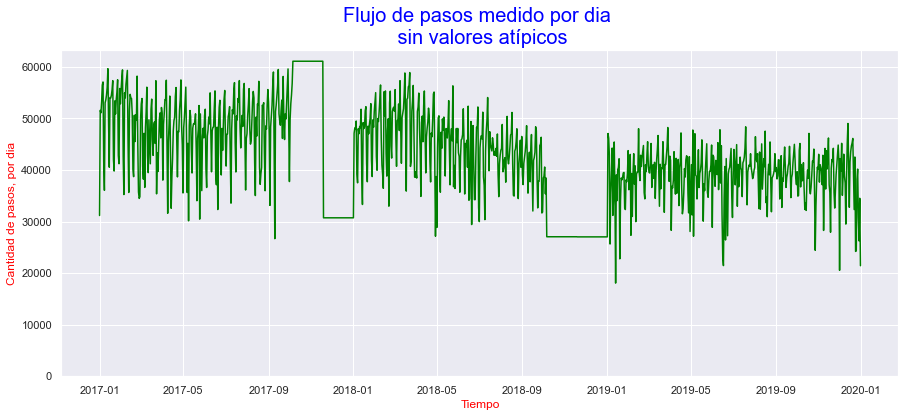

In [45]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos,color='green')
plt.title("Flujo de pasos medido por dia \n sin valores atípicos", color= 'blue', fontsize= 20)
plt.xlabel('Tiempo', color='red')
plt.ylabel('Cantidad de pasos, por dia',color='red' )
plt.ylim(ymin=0)
plt.show()

   Se puede observar que ya no tenemos valores menores a 10000 pasos diarios, no hay valores atipicos en este gráfico.

In [46]:
d_2017_06 =data_2017[(data_2017.estacion=='Illia')& (data_2017.fecha=='2017-04-06')]
d_2017_06=d_2017_06.loc[:, ['forma_pago' ,'cantidad_pasos']]
d_2017_06.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
forma_pago,
NO COBRADO,45961
TELEPASE,19296
EFECTIVO,40
EXENTO,1


Analizamos la fecha 06/04/2017 porque presenta un valor atipico de 40 pasos debido a que ese día hubo paro nacional

In [47]:
d_2018_25 =data_2018[(data_2018.estacion=='Illia')& (data_2018.fecha=='2018-06-25')]
d_2018_25=d_2018_25.loc[:, ['forma_pago' ,'cantidad_pasos']]
d_2018_25.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
forma_pago,
NO COBRADO,85099


        El día 25/06/2018 hay cero pagos en efectivo debido al paro nacional
         

In [48]:
d_2018_25_9 =data_2018[(data_2018.estacion=='Illia')& (data_2018.fecha=='2018-09-25')]
d_2018_25_9=d_2018_25_9.loc[:, ['forma_pago' ,'cantidad_pasos']]
d_2018_25_9.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
forma_pago,
NO COBRADO,78690


La disminución del cobro en efectivo durante el 25/09/2018, se debió al no cobro de pasajes por el paro nacional

In [49]:
d_2019_29 =data_2019[(data_2019.estacion=='Illia')& (data_2019.fecha=='2019-05-29')]
d_2019_29=d_2019_29.loc[:, ['forma_pago' ,'cantidad_pasos']]
d_2019_29.groupby('forma_pago').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
forma_pago,
NO COBRADO,87419


No hubo pagos debido al paro nacional el día 29/05/2019

In [50]:
#Unimos los 3 dataset_ncs, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_nc = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask_1 = np.logical_and(dataset_nc.estacion=='Illia', dataset_nc.forma_pago == 'NO COBRADO')
dataset_nc = dataset_nc[mask_1]

#Quitamos las columnas que no vamos a utilizar
dataset_nc.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_nc.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
19,2019-01-01,1,Martes,Centro,Liviano,146
22,2019-01-01,1,Martes,Provincia,Liviano,147
24,2019-01-01,1,Martes,Provincia,Pesado,3
83,2019-01-01,2,Martes,Centro,Liviano,8
91,2019-01-01,2,Martes,Provincia,Liviano,4


In [51]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_nc['fecha2'] = pd.to_datetime(dataset_nc.fecha) + pd.to_timedelta(dataset_nc.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_nc.drop(columns=['fecha','hora_fin'], inplace = True)

dataset_nc.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
19,Martes,Centro,Liviano,146,2019-01-01 01:00:00
22,Martes,Provincia,Liviano,147,2019-01-01 01:00:00
24,Martes,Provincia,Pesado,3,2019-01-01 01:00:00
83,Martes,Centro,Liviano,8,2019-01-01 02:00:00
91,Martes,Provincia,Liviano,4,2019-01-01 02:00:00


In [52]:
#Corregimos el nombre de fecha2 a fecha
dataset_nc.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_nc.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
19,Martes,Centro,Liviano,146,2019-01-01 01:00:00
22,Martes,Provincia,Liviano,147,2019-01-01 01:00:00
24,Martes,Provincia,Pesado,3,2019-01-01 01:00:00
83,Martes,Centro,Liviano,8,2019-01-01 02:00:00
91,Martes,Provincia,Liviano,4,2019-01-01 02:00:00


In [53]:
#Reordenamos el dataset_nc por fecha
dataset_nc.sort_values('fecha', inplace = True)
dataset_nc.reset_index(drop=True, inplace = True)
dataset_nc

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Centro,Liviano,183,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,3,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,157,2017-01-01 01:00:00
3,Domingo,Centro,Liviano,252,2017-01-01 01:00:00
4,Domingo,Centro,Liviano,73,2017-01-01 02:00:00
...,...,...,...,...,...
55901,Martes,Provincia,Liviano,24,2019-12-31 21:00:00
55902,Martes,Centro,Liviano,11,2019-12-31 22:00:00
55903,Martes,Provincia,Liviano,27,2019-12-31 22:00:00
55904,Martes,Centro,Liviano,3,2019-12-31 23:00:00


In [54]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_nc = dataset_nc.resample('D', on = 'fecha').sum()
print(diario_nc.shape)
diario_nc.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,1306
2017-01-02,627
2017-01-03,538
2017-01-04,618
2017-01-05,604


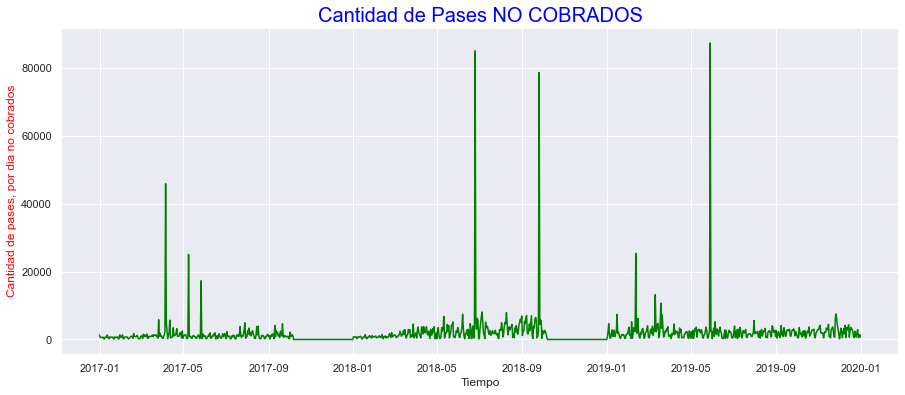

In [55]:
plt.figure(figsize = (15,6))
plt.plot(diario_nc.index, diario_nc.cantidad_pasos,color='green')
plt.title("Cantidad de Pases NO COBRADOS", color= 'blue', fontsize= 20)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pases, por dia no cobrados',color='red' )
plt.show()

Conclusión los dias que se producen los picos negativos de los cobros en Efectivo, se producen picos positivos de los No Cobrados

Cuál fué el día de la semana con más pases?

In [56]:
masc_h= dataset[dataset.cantidad_pasos>=(dataset.cantidad_pasos.mean()+ dataset.cantidad_pasos.std())]
masc_h

,dia,sentido,tipo_vehiculo,cantidad_pasos
fecha,,,,
2017-01-01 00:00:00,Domingo,Centro,Liviano,857
2017-01-01 00:00:00,Domingo,Provincia,Liviano,644
2017-01-01 02:00:00,Domingo,Centro,Liviano,783
2017-01-01 03:00:00,Domingo,Centro,Liviano,988
2017-01-01 03:00:00,Domingo,Provincia,Liviano,704
...,...,...,...,...
2019-12-31 18:00:00,Martes,Provincia,Liviano,643
2019-12-31 19:00:00,Martes,Provincia,Liviano,640
2019-12-31 20:00:00,Martes,Provincia,Liviano,773


In [57]:
masc_h.groupby('dia').sum().sort_values('cantidad_pasos', ascending=False)
#los días de mayor cantidad de pasos son los viernes

,cantidad_pasos
dia,
Viernes,5243284
Jueves,4930366
Miércoles,4747999
Martes,4556178
Lunes,4411956
Sábado,4271185
Domingo,3530276


¿Cuál fué la hora y de que fecha con más pases?

In [58]:
masc_h.groupby('fecha').sum().sort_values('cantidad_pasos', ascending=False)

,cantidad_pasos
fecha,
2017-10-05 18:00:00,3842
2017-10-05 17:00:00,3574
2017-09-28 18:00:00,3564
2017-09-17 19:00:00,3533
2017-09-17 17:00:00,3529
...,...
2019-11-05 08:00:00,617
2019-12-27 23:00:00,617
2017-03-12 10:00:00,617


Cuál fué el sentido con más pases?

In [59]:
masc_h.groupby('sentido').sum().sort_values('cantidad_pasos', ascending=False)
#El sentido con más pases es el Centro

,cantidad_pasos
sentido,
Centro,16481546
Provincia,15209698


¿Cuál fué la fecha con más pases?

In [60]:
masc_d= diario[diario.cantidad_pasos>=(diario.cantidad_pasos.mean()+ diario.cantidad_pasos.std())]
masc_d.sort_values('cantidad_pasos',ascending=False)
#Nos muestra de mayor a menor las fechas de mayor pase 

,cantidad_pasos
fecha,
2017-11-05,61099.0
2017-10-20,61099.0
2017-11-14,61099.0
2017-11-15,61099.0
2017-11-16,61099.0
...,...
2017-01-02,51568.0
2017-09-19,51556.0
2018-01-18,51548.0


Investigamos Cada Año

AÑO 2017

In [61]:
da1_2017 =data_2017[data_2017.estacion=='Illia']
da1_2017.describe(include='all')

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
count,224230.0,224230,224230.000000,224230.000000,224230,224230,224230,224230,224230,224230.000000
unique,NaN,279,NaN,NaN,7,1,2,2,7,NaN
top,NaN,2017-01-30,NaN,NaN,Viernes,Illia,Centro,Pesado,EFECTIVO,NaN
freq,NaN,906,NaN,NaN,33841,224230,125623,124985,80644,NaN
mean,2017.0,NaN,11.968367,12.098725,NaN,NaN,NaN,NaN,NaN,112.215457
std,0.0,NaN,6.536909,6.607509,NaN,NaN,NaN,NaN,NaN,341.078034
min,2017.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2017.0,NaN,7.000000,7.000000,NaN,NaN,NaN,NaN,NaN,2.000000
50%,2017.0,NaN,12.000000,12.000000,NaN,NaN,NaN,NaN,NaN,6.000000
75%,2017.0,NaN,17.000000,18.000000,NaN,NaN,NaN,NaN,NaN,23.000000


In [62]:
da1_2017['forma_pago'].value_counts()

EFECTIVO                80644
TELEPASE                61464
EXENTO                  30128
INFRACCION              18519
TARJETA DISCAPACIDAD    16837
NO COBRADO              16624
MONEDERO                   14
Name: forma_pago, dtype: int64

In [63]:
data_2017['forma_pago'].value_counts()

EFECTIVO                343165
TELEPASE                302945
EXENTO                  130388
INFRACCION              106293
NO COBRADO               89111
TARJETA DISCAPACIDAD     76659
MONEDERO                    14
Name: forma_pago, dtype: int64

  La estación Illia en el año 2017 la principal forma de pago es el Efectivo coincide con el resto de las estaciones.

AÑO 2018

In [64]:
da1_2018 =data_2018[data_2018.estacion=='Illia']
da1_2018.describe(include='all')

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
count,229101.0,229101,229101.000000,229101.000000,229101,229101,229101,229101,229101,229101.000000
unique,NaN,279,NaN,NaN,7,1,2,2,6,NaN
top,NaN,2018-10-05,NaN,NaN,Viernes,Illia,Centro,Pesado,EFECTIVO,NaN
freq,NaN,960,NaN,NaN,35101,229101,119412,125910,77444,NaN
mean,2018.0,NaN,11.954291,12.069092,NaN,NaN,NaN,NaN,NaN,115.305101
std,0.0,NaN,6.546898,6.615722,NaN,NaN,NaN,NaN,NaN,354.699918
min,2018.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2018.0,NaN,7.000000,7.000000,NaN,NaN,NaN,NaN,NaN,2.000000
50%,2018.0,NaN,12.000000,12.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,2018.0,NaN,17.000000,18.000000,NaN,NaN,NaN,NaN,NaN,20.000000


In [65]:
da1_2018['forma_pago'].value_counts()

EFECTIVO                77444
TELEPASE                67540
EXENTO                  28937
INFRACCION              22362
NO COBRADO              17938
TARJETA DISCAPACIDAD    14880
Name: forma_pago, dtype: int64

In [66]:
data_2018['forma_pago'].value_counts()

EFECTIVO                326628
TELEPASE                323435
EXENTO                  123912
INFRACCION              115318
NO COBRADO               92682
TARJETA DISCAPACIDAD     66600
Name: forma_pago, dtype: int64

 La estación Illia en el año 2018 la principal forma de pago es el Efectivo coincide con el resto de las estaciones.

AÑO 2019

In [67]:
#Sobre la estacion Illia
da1_2019 =data_2019[data_2019.estacion=='Illia']
da1_2019.describe(include='all')

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
count,161133.0,161133,161133.000000,161133.000000,161133,161133,161133,161133,161133,161133.000000
unique,NaN,365,NaN,NaN,7,1,2,2,6,NaN
top,NaN,2019-03-15,NaN,NaN,Martes,Illia,Provincia,Liviano,TELEPASE,NaN
freq,NaN,480,NaN,NaN,23602,161133,81283,100861,34788,NaN
mean,2019.0,NaN,11.770004,11.827180,NaN,NaN,NaN,NaN,NaN,211.968790
std,0.0,NaN,6.718099,6.759874,NaN,NaN,NaN,NaN,NaN,488.961921
min,2019.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2019.0,NaN,6.000000,6.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,2019.0,NaN,12.000000,12.000000,NaN,NaN,NaN,NaN,NaN,12.000000
75%,2019.0,NaN,17.000000,18.000000,NaN,NaN,NaN,NaN,NaN,68.000000


In [68]:
#Sobre la estacion Illia
da1_2019['forma_pago'].value_counts()

TELEPASE           34788
EFECTIVO           34643
EXENTO             29204
INFRACCION         24015
NO COBRADO         21344
T. DISCAPACIDAD    17139
Name: forma_pago, dtype: int64

In [69]:
# de todas las estaciones
data_2019['forma_pago'].value_counts()

TELEPASE           201388
EFECTIVO           149340
NO COBRADO         141280
EXENTO             132716
INFRACCION         111428
T. DISCAPACIDAD     76001
Name: forma_pago, dtype: int64

La estación Illia en el año 2019 la principal forma de pago es el Telepase coincide con el resto de las estaciones.

In [70]:
# Autopista Illia: Efectivo y Telepase
#Unimos los 3 dataset_t, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_t = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask_t_i = np.logical_and(dataset_t.estacion=='Illia', dataset_t.forma_pago == 'TELEPASE')
dataset_t = dataset_t[mask_t_i]
#Quitamos las columnas que no vamos a utilizar
dataset_t.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_t['fecha2'] = pd.to_datetime(dataset_t.fecha) + pd.to_timedelta(dataset_t.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_t.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset_t.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset_t por fecha
dataset_t.sort_values('fecha', inplace = True)
dataset_t.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_t = dataset_t.resample('D', on = 'fecha').sum()

In [71]:
print("Año-2017")
print("Porcentaje de pago en Efectivo  sobre el total de pagos: ", "{0:.0%}".format
      (da1_2017[da1_2017.forma_pago=='EFECTIVO'].shape[0]/da1_2017["forma_pago"].shape[0]))
print("Porcentaje de pago Con Telepase sobre el total de pagos: ", "{0:.0%}".format
      (da1_2017[da1_2017.forma_pago=='TELEPASE'].shape[0]/da1_2017["forma_pago"].shape[0]))

Año-2017
Porcentaje de pago en Efectivo  sobre el total de pagos:  36%
Porcentaje de pago Con Telepase sobre el total de pagos:  27%


In [72]:
print("Año-2018")
print("Porcentaje de pago en Efectivo  sobre el total de pagos: ", "{0:.0%}".format
      (da1_2018[da1_2018.forma_pago=='EFECTIVO'].shape[0]/da1_2018["forma_pago"].shape[0]))
print("Porcentaje de pago Con Telepase sobre el total de pagos: ", "{0:.0%}".format
      (da1_2018[da1_2018.forma_pago=='TELEPASE'].shape[0]/da1_2018["forma_pago"].shape[0]))

Año-2018
Porcentaje de pago en Efectivo  sobre el total de pagos:  34%
Porcentaje de pago Con Telepase sobre el total de pagos:  29%


In [73]:
print("Año-2019")
print("Porcentaje de pago en Efectivo  sobre el total de pagos: ", "{0:.0%}".format
      (da1_2019[da1_2019.forma_pago=='EFECTIVO'].shape[0]/da1_2019["forma_pago"].shape[0]))
print("Porcentaje de pago Con Telepase sobre el total de pagos: ", "{0:.0%}".format
      (da1_2019[da1_2019.forma_pago=='TELEPASE'].shape[0]/da1_2019["forma_pago"].shape[0]))

Año-2019
Porcentaje de pago en Efectivo  sobre el total de pagos:  21%
Porcentaje de pago Con Telepase sobre el total de pagos:  22%


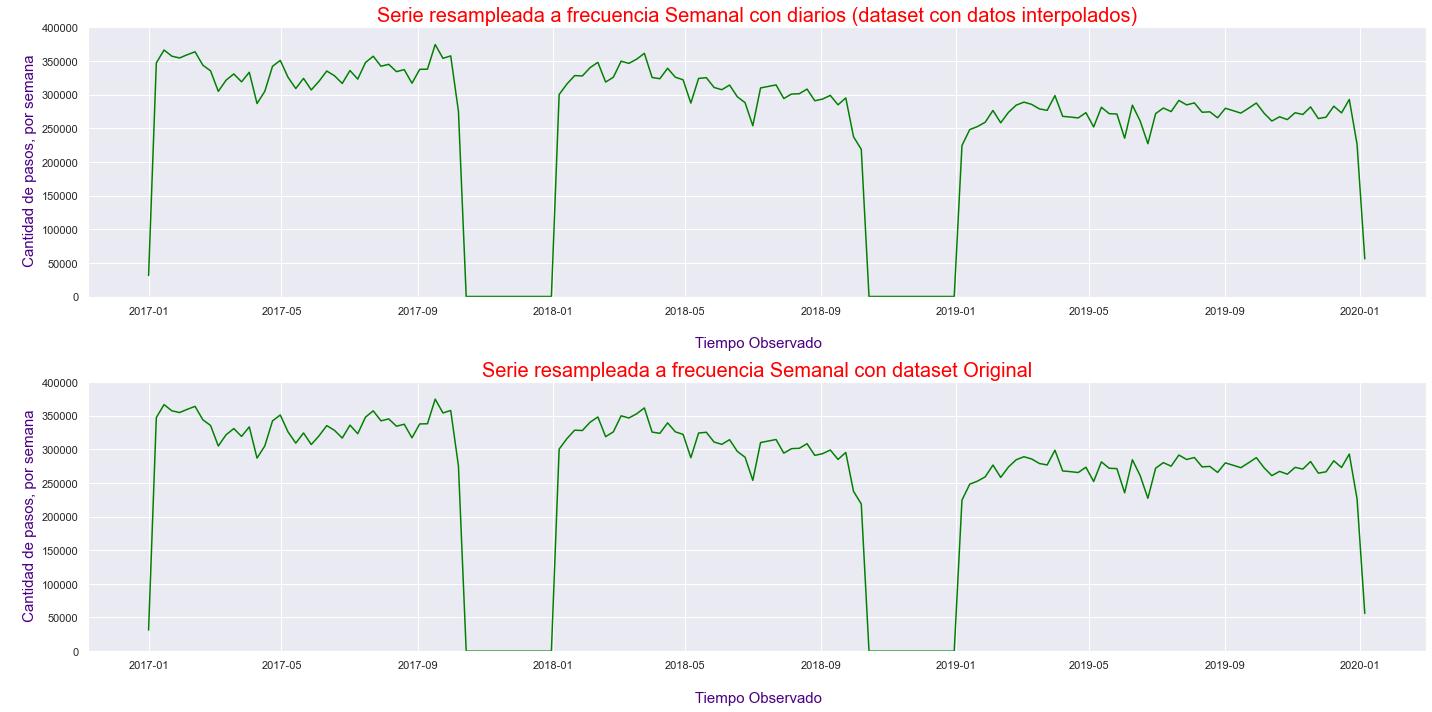

In [74]:
plt.figure(figsize = (20,10))
Gs= gridspec.GridSpec(2,1)
ax0= plt.subplot(Gs[0])
plt.plot(semanal.index, semanal.cantidad_pasos,color='green')
plt.title("Serie resampleada a frecuencia Semanal con diarios (dataset con datos interpolados)", color= 'red', fontsize= 20)
plt.xlabel('\n Tiempo Observado', color= 'indigo', fontsize= 15)
plt.ylabel('\n Cantidad de pasos, por semana', color= 'indigo', fontsize= 15)
plt.ylim(0,400000)
ax1= plt.subplot(Gs[1])
plt.plot(semanal.index, semanal.cantidad_pasos,color='green')
plt.title("Serie resampleada a frecuencia Semanal con dataset Original", color= 'red', fontsize= 20)
plt.xlabel('\n Tiempo Observado', color= 'indigo', fontsize= 15)
plt.ylabel('\n Cantidad de pasos, por semana', color= 'indigo', fontsize= 15)
plt.ylim(0,400000)
plt.tight_layout()
plt.show()

Graficamos la Serie Temporal Diaria y la Serie Semanal resamplada con la SUMA*

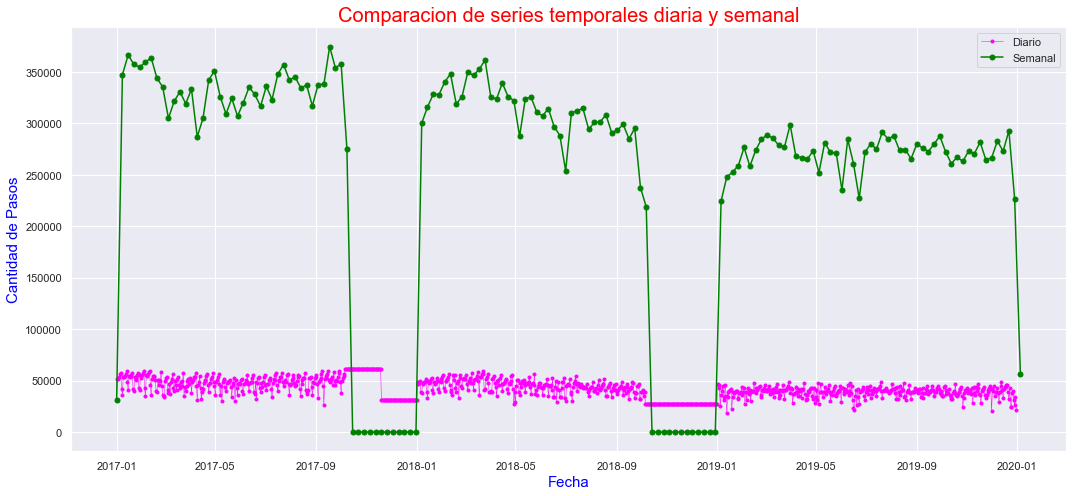

In [75]:
fig,eje = plt.subplots(figsize = (15,7))
eje.plot(diario,marker='.',linestyle='-',linewidth=0.5,label='Diario', color='magenta')
eje.plot(semanal,marker='o',markersize=5,label='Semanal', color='green')
eje.set_ylabel('Cantidad de Pasos', color='blue',fontsize= 15 )
eje.set_xlabel('Fecha', color='blue',fontsize= 15 )
eje.legend()
plt.title("Comparacion de series temporales diaria y semanal", color= 'red', fontsize= 20)
plt.tight_layout()
plt.show()

*Graficamos la Serie Temporal Diaria y la Serie Media Semanal resamplada con la Media*

In [76]:
semanal_m =diario.resample('W').mean()
print(semanal_m.shape)
semanal_m

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183.000000
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
...,...
2019-12-08,40413.000000
2019-12-15,38994.285714
2019-12-22,41840.142857


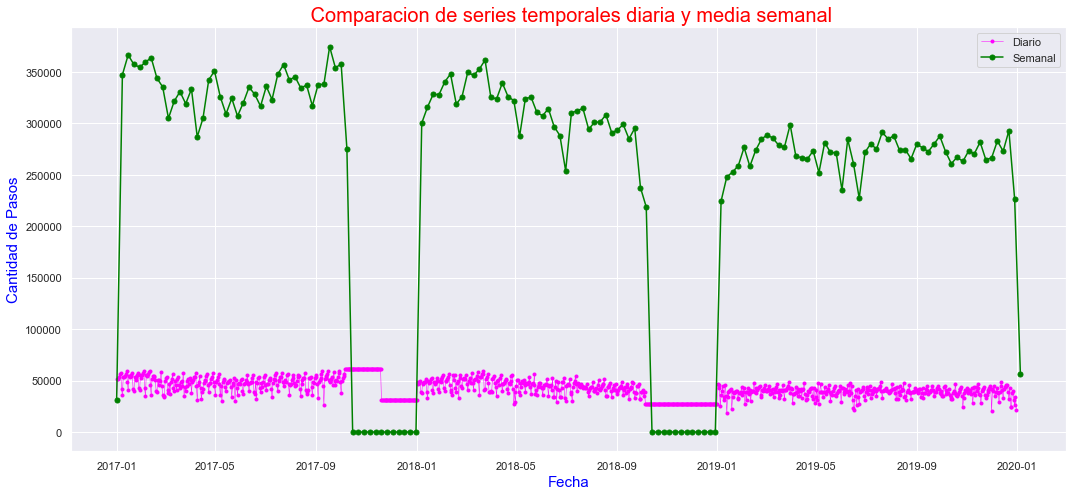

In [77]:
fig,eje = plt.subplots(figsize = (15,7))
eje.plot(diario,marker='.',linestyle='-',linewidth=0.5,label='Diario', color='magenta')
eje.plot(semanal,marker='o',markersize=5,label='Semanal', color='green')
eje.set_ylabel('Cantidad de Pasos', color='blue',fontsize= 15 )
eje.set_xlabel('Fecha', color='blue',fontsize= 15 )
plt.legend()
plt.title(" Comparacion de series temporales diaria y media semanal", color= 'red', fontsize= 20)
plt.tight_layout()
plt.show()

Se puede observar que las medias para las series temporales semanales son más suaves que para las series temporales diarias porque se ha promediado una variabilidad de frecuencia más alta en el remuestreo.

 Antes los resultados obtenidos, y entendiendo que siempre es mejor trabajar con la media de pases por semana. Por lo tanto en nuestros modelos trabajaremos con la forma resampleada en media Semanal

In [78]:
da_2017 =data_2017[data_2017.estacion=='Illia']
da_2017.describe(include='all')

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
count,224230.0,224230,224230.000000,224230.000000,224230,224230,224230,224230,224230,224230.000000
unique,NaN,279,NaN,NaN,7,1,2,2,7,NaN
top,NaN,2017-01-30,NaN,NaN,Viernes,Illia,Centro,Pesado,EFECTIVO,NaN
freq,NaN,906,NaN,NaN,33841,224230,125623,124985,80644,NaN
mean,2017.0,NaN,11.968367,12.098725,NaN,NaN,NaN,NaN,NaN,112.215457
std,0.0,NaN,6.536909,6.607509,NaN,NaN,NaN,NaN,NaN,341.078034
min,2017.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2017.0,NaN,7.000000,7.000000,NaN,NaN,NaN,NaN,NaN,2.000000
50%,2017.0,NaN,12.000000,12.000000,NaN,NaN,NaN,NaN,NaN,6.000000
75%,2017.0,NaN,17.000000,18.000000,NaN,NaN,NaN,NaN,NaN,23.000000


In [79]:
da_2018 =data_2018[data_2018.estacion=='Illia']
da_2018.describe(include='all')

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
count,229101.0,229101,229101.000000,229101.000000,229101,229101,229101,229101,229101,229101.000000
unique,NaN,279,NaN,NaN,7,1,2,2,6,NaN
top,NaN,2018-10-05,NaN,NaN,Viernes,Illia,Centro,Pesado,EFECTIVO,NaN
freq,NaN,960,NaN,NaN,35101,229101,119412,125910,77444,NaN
mean,2018.0,NaN,11.954291,12.069092,NaN,NaN,NaN,NaN,NaN,115.305101
std,0.0,NaN,6.546898,6.615722,NaN,NaN,NaN,NaN,NaN,354.699918
min,2018.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2018.0,NaN,7.000000,7.000000,NaN,NaN,NaN,NaN,NaN,2.000000
50%,2018.0,NaN,12.000000,12.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,2018.0,NaN,17.000000,18.000000,NaN,NaN,NaN,NaN,NaN,20.000000


In [80]:
#Sobre la estacion Illia
da_2019 =data_2019[data_2019.estacion=='Illia']
da_2019.describe(include='all')

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
count,161133.0,161133,161133.000000,161133.000000,161133,161133,161133,161133,161133,161133.000000
unique,NaN,365,NaN,NaN,7,1,2,2,6,NaN
top,NaN,2019-03-15,NaN,NaN,Martes,Illia,Provincia,Liviano,TELEPASE,NaN
freq,NaN,480,NaN,NaN,23602,161133,81283,100861,34788,NaN
mean,2019.0,NaN,11.770004,11.827180,NaN,NaN,NaN,NaN,NaN,211.968790
std,0.0,NaN,6.718099,6.759874,NaN,NaN,NaN,NaN,NaN,488.961921
min,2019.0,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2019.0,NaN,6.000000,6.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,2019.0,NaN,12.000000,12.000000,NaN,NaN,NaN,NaN,NaN,12.000000
75%,2019.0,NaN,17.000000,18.000000,NaN,NaN,NaN,NaN,NaN,68.000000


Comparamos Estacion Illia con Avellaneda: las dos formas de pago

In [81]:
#Unimos los 3 dataset_t, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_t = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask_t_i = np.logical_and(dataset_t.estacion=='Illia', dataset_t.forma_pago == 'TELEPASE')
dataset_t = dataset_t[mask_t_i]
#Quitamos las columnas que no vamos a utilizar
dataset_t.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_t['fecha2'] = pd.to_datetime(dataset_t.fecha) + pd.to_timedelta(dataset_t.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_t.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset_t.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset_t por fecha
dataset_t.sort_values('fecha', inplace = True)
dataset_t.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_t = dataset_t.resample('D', on = 'fecha').sum()

In [82]:
print("Año-2017")
print("Porcentaje de pago en Efectivo  sobre el total de pagos: ", "{0:.0%}".format
      (da_2017[da_2017.forma_pago=='EFECTIVO'].shape[0]/da_2017["forma_pago"].shape[0]))
print("Porcentaje de pago Con Telepase sobre el total de pagos: ", "{0:.0%}".format
      (da_2017[da_2017.forma_pago=='TELEPASE'].shape[0]/da_2017["forma_pago"].shape[0]))

Año-2017
Porcentaje de pago en Efectivo  sobre el total de pagos:  36%
Porcentaje de pago Con Telepase sobre el total de pagos:  27%


In [83]:
print("Año-2018")
print("Porcentaje de pago en Efectivo  sobre el total de pagos: ", "{0:.0%}".format
      (da_2018[da_2018.forma_pago=='EFECTIVO'].shape[0]/da_2018["forma_pago"].shape[0]))
print("Porcentaje de pago Con Telepase sobre el total de pagos: ", "{0:.0%}".format
      (da_2018[da_2018.forma_pago=='TELEPASE'].shape[0]/da_2018["forma_pago"].shape[0]))

Año-2018
Porcentaje de pago en Efectivo  sobre el total de pagos:  34%
Porcentaje de pago Con Telepase sobre el total de pagos:  29%


In [84]:
print("Año-2019")
print("Porcentaje de pago en Efectivo  sobre el total de pagos: ", "{0:.0%}".format
      (da_2019[da_2019.forma_pago=='EFECTIVO'].shape[0]/da_2019["forma_pago"].shape[0]))
print("Porcentaje de pago Con Telepase sobre el total de pagos: ", "{0:.0%}".format
      (da_2019[da_2019.forma_pago=='TELEPASE'].shape[0]/da_2019["forma_pago"].shape[0]))

Año-2019
Porcentaje de pago en Efectivo  sobre el total de pagos:  21%
Porcentaje de pago Con Telepase sobre el total de pagos:  22%


In [85]:
#Unimos los 3 dataset_a, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_a = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask_a = np.logical_and(dataset_a.estacion=='Avellaneda', dataset_a.forma_pago == 'EFECTIVO')
dataset_a = dataset_a[mask_a]
#Quitamos las columnas que no vamos a utilizar
dataset_a.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_a['fecha2'] = pd.to_datetime(dataset_a.fecha) + pd.to_timedelta(dataset_a.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_a.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset_a.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset_a por fecha
dataset_a.sort_values('fecha', inplace = True)
dataset_a.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_a = dataset_a.resample('D', on = 'fecha').sum()
diario_a.head()

,cantidad_pasos
fecha,
2017-01-01,72504
2017-01-02,87547
2017-01-03,86139
2017-01-04,88180
2017-01-05,90281


In [86]:
#Unimos los 3 dataset_a_t, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset_a_t = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask_a_t = np.logical_and(dataset_a_t.estacion=='Avellaneda', dataset_a_t.forma_pago == 'TELEPASE')
dataset_a_t = dataset_a_t[mask_a_t]
#Quitamos las columnas que no vamos a utilizar
dataset_a_t.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_a_t['fecha2'] = pd.to_datetime(dataset_a_t.fecha) + pd.to_timedelta(dataset_a_t.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_a_t.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset_a_t.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset_a_t por fecha
dataset_a_t.sort_values('fecha', inplace = True)
dataset_a_t.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_a_t = dataset_a_t.resample('D', on = 'fecha').sum()
diario_a_t.head()

,cantidad_pasos
fecha,
2017-01-01,22024
2017-01-02,43988
2017-01-03,46780
2017-01-04,46623
2017-01-05,48311


In [87]:
#unimos los dataset de trabajo
dataset = pd.concat([data_2019, data_2018, data_2017])
#union en arreglo para graficos
datasets=[data_2017,data_2018,data_2019] #parafunciones

In [88]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Avellaneda', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]
#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

In [89]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
4,Martes,Centro,Liviano,16,2019-01-01 01:00:00
9,Martes,Provincia,Liviano,12,2019-01-01 01:00:00
42,Martes,Centro,Liviano,1327,2019-01-01 02:00:00
48,Martes,Centro,Pesado,6,2019-01-01 02:00:00
52,Martes,Provincia,Liviano,1059,2019-01-01 02:00:00


In [90]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 

In [91]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)

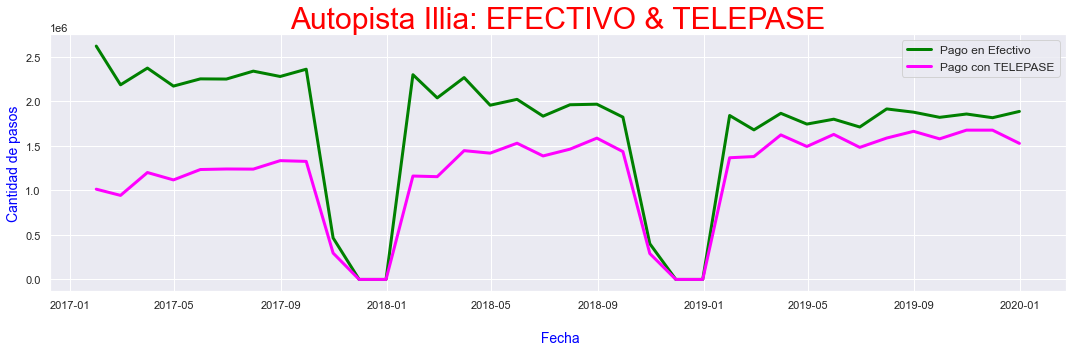

In [92]:
# A los fines de poder visualizar la tendencia se hizo un resampleo a la forma mensual
mensual_t =dataset_t.resample('M', on = 'fecha').sum()
mensual =dataset.resample('M', on = 'fecha').sum()

plt.figure(figsize=(15,5))
plt.plot(mensual.index, mensual.cantidad_pasos,lw=3,color='green', label='Pago en Efectivo')
plt.plot(mensual_t.index, mensual_t.cantidad_pasos, lw=3, color='magenta',label='Pago con TELEPASE')
plt.title ('Autopista Illia: EFECTIVO & TELEPASE', color='red', fontsize=30)
plt.xlabel('\n Fecha', color='blue',fontsize=14)
plt.ylabel('Cantidad de pasos', color='blue',fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


En la estacion Illia el pago en efectivo es mayor que el telepase, sobre todo en el 2017 y 2018.

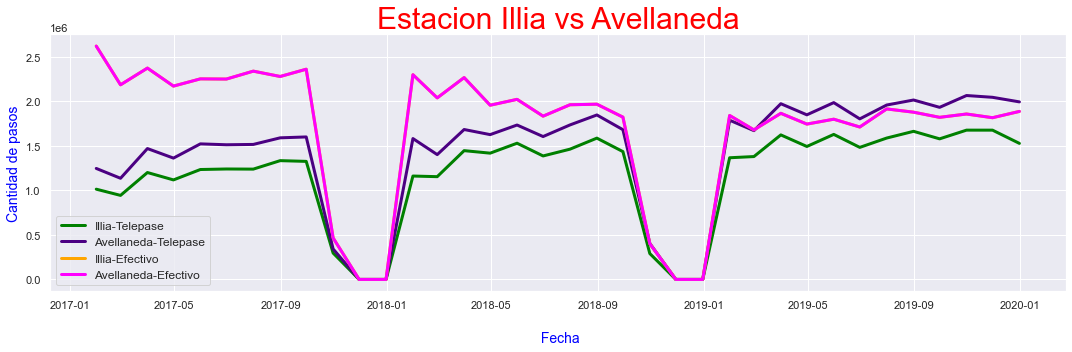

In [93]:
# A los fines de poder visualizar la tendencia se hizo un resampleo a la forma mensual
mensual_t =dataset_t.resample('M', on = 'fecha').sum()
mensual_a =dataset_a.resample('M', on = 'fecha').sum()
mensual_a_t =dataset_a_t.resample('M', on = 'fecha').sum()
mensual =dataset.resample('M', on = 'fecha').sum()

plt.figure(figsize=(15,5))
plt.plot(mensual_t.index, mensual_t.cantidad_pasos,lw=3,color='green', label='Illia-Telepase')
plt.plot(mensual_a_t.index, mensual_a_t.cantidad_pasos, lw=3, color='indigo',label='Avellaneda-Telepase')
plt.plot(mensual.index, mensual.cantidad_pasos,lw=3,color='orange', label='Illia-Efectivo')
plt.plot(mensual_a.index, mensual_a.cantidad_pasos, lw=3, color='magenta',label='Avellaneda-Efectivo')


plt.title ('Estacion Illia vs Avellaneda', color='red', fontsize=30)
plt.xlabel('\n Fecha', color='blue',fontsize=14)
plt.ylabel('Cantidad de pasos', color='blue',fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Comparamos las dos estaciones y se observa que la estacion avellaneda tiene mas pasos que la estacion Illia, y que los años 2017 y 2018 se pagaba en su mayoría en Efectivo y luego gana el Telepase en Avellaneda.

In [94]:
#tres años, diario. ventana creada
#Center, me pone nulos al principio y al final.
ventana = int(365*3/30)
print(ventana)
diario_promedio_tendencia = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_promedio_tendencia

36


fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

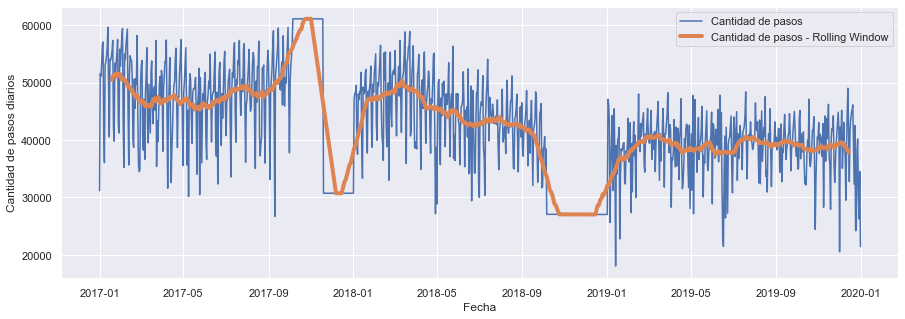

In [95]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos diarios')
plt.legend()
plt.show()

Estacionalidad

In [96]:
X = diario.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=47149.671533, mean2=37543.237660
variance1=75876549.370212, variance2=44122786.981909


Podemos observar que la media de nuestros datos son muy similares sin embargo cuando observamos la varianza podemos detectar que la diferencia no es estadisitcamente significativa por lo que podemos creer que estamos hablando de una serie de tiempo Estacionaria.

Test Dickey Fuller

Ho: La serie es no estacionaria

H1: La serie es estacionaria

In [97]:
from statsmodels.tsa.stattools import adfuller
X = diario.cantidad_pasos
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.808007
p-value: 0.057139
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Valor p> 0.05 : No se rechaza la hipótesis nula (H0), los datos tienen una raíz unitaria y no son estacionarios.
p-value <= 0.05 : Rechaza la hipótesis nula (H0), los datos no tienen raíz unitaria y son estacionarios.

Imprime el valor de la estadística de prueba de -4. Cuanto más negativa sea esta estadística, es más probable que rechacemos la hipótesis nula (tenemos un conjunto de datos estacionario).

Como parte del resultado, obtenemos una tabla de búsqueda para ayudar a determinar la estadística ADF. Podemos ver que nuestro valor estadístico de -4 es menor que el valor de -3.436 al 1%.

Esto sugiere que podemos rechazar la hipótesis nula con un nivel de significancia de menos del 1% (es decir, una baja probabilidad de que el resultado sea una casualidad estadística).

Rechazar la hipótesis nula significa que el proceso no tiene raíz unitaria y, a su vez, la serie de tiempo es estacionaria o no tiene una estructura dependiente del tiempo.

Media movil

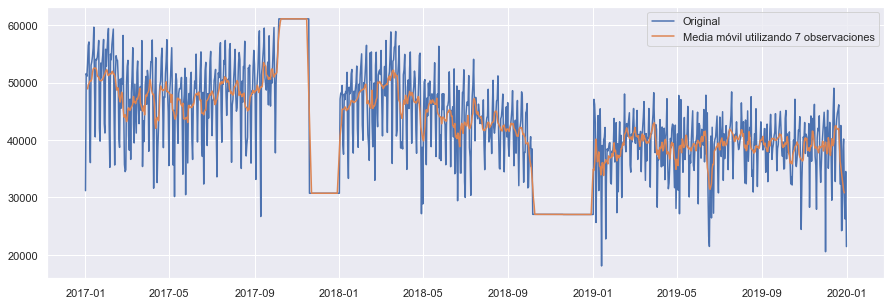

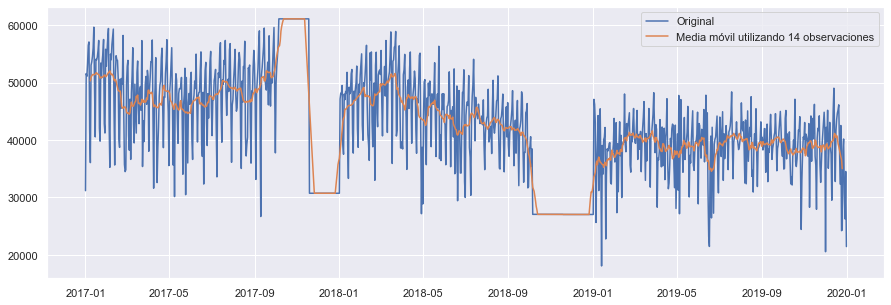

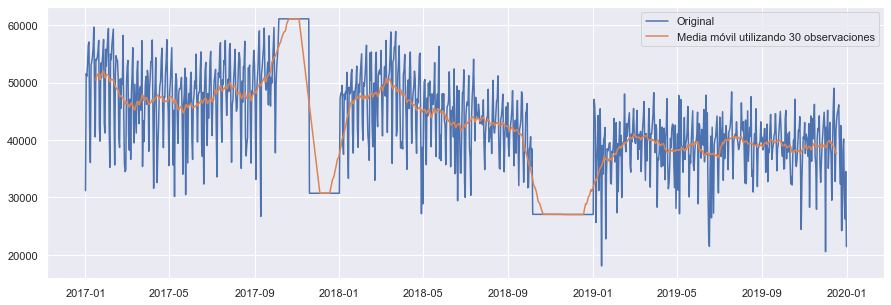

In [98]:
# Media movil
y_hat_avg = diario.copy()
y_hat_avg['moving_avg_forecast'] = diario['cantidad_pasos'].rolling(7,center = True).mean() 
# Promedio de las últimas 10 observaciones.
y_hat_avg=pd.DataFrame(y_hat_avg).set_index(diario.index.values)
plt.figure(figsize=(15,5)) 
plt.plot(diario['cantidad_pasos'], label='Original')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Media móvil utilizando 7 observaciones')
plt.legend(loc='best')
plt.show()

y_hat_avg = diario.copy()
y_hat_avg['moving_avg_forecast'] = diario['cantidad_pasos'].rolling(14,center = True).mean() 
# Promedio de las últimas 14 observaciones.
y_hat_avg=pd.DataFrame(y_hat_avg).set_index(diario.index.values)
plt.figure(figsize=(15,5))
plt.plot(diario['cantidad_pasos'], label='Original')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Media móvil utilizando 14 observaciones')
plt.legend(loc='best')
plt.show()

y_hat_avg = diario.copy()
y_hat_avg['moving_avg_forecast'] = diario['cantidad_pasos'].rolling(30,center = True).mean() 
# Promedio de las últimas 30 observaciones.
y_hat_avg=pd.DataFrame(y_hat_avg).set_index(diario.index.values)
plt.figure(figsize=(15,5))
plt.plot(diario['cantidad_pasos'], label='Original')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Media móvil utilizando 30 observaciones')
plt.legend(loc='best')
plt.show()

Autocorrelacion

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


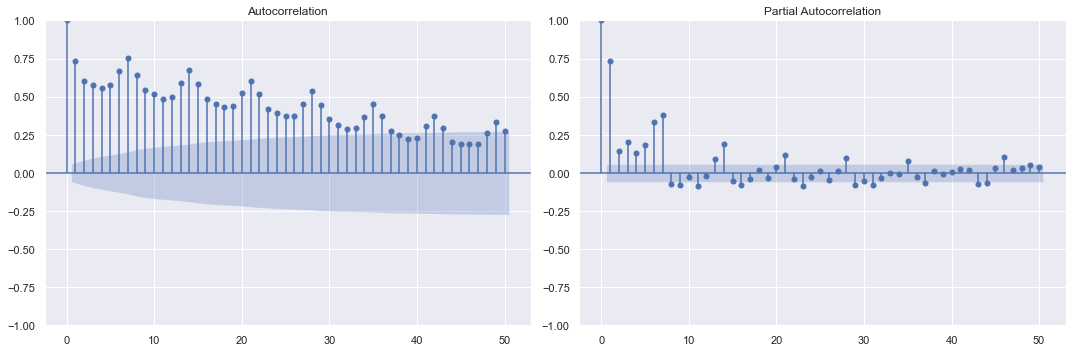

In [99]:
fig, axarr = plt.subplots(1,2,figsize=(15, 5))
plot_acf(diario.cantidad_pasos, lags = 50, ax=axarr[0])
plot_pacf(diario.cantidad_pasos, lags = 50,ax=axarr[1])
plt.tight_layout()
plt.show()

Podemos ver que existe un correlacion relevante para cada dia en un rango de 7 dias dentro de un periodo de 30 dias, que es refente a lo que dura un mes calendario. Es decir para poder estimar un dia, necesitamos los 7 anteriores y si queremos predecir una semana es necesario contar con 30 dias para lograr explicar los errores.

Descomponiendo de la serie

In [100]:
#Calculamos la decomposición aditiva
additive_result = seasonal_decompose(diario.cantidad_pasos, model='additive', extrapolate_trend='freq')
#Calculamos la decomposición multiplicativa
mult_result = seasonal_decompose(diario.cantidad_pasos, model='multiplicative', extrapolate_trend='freq')

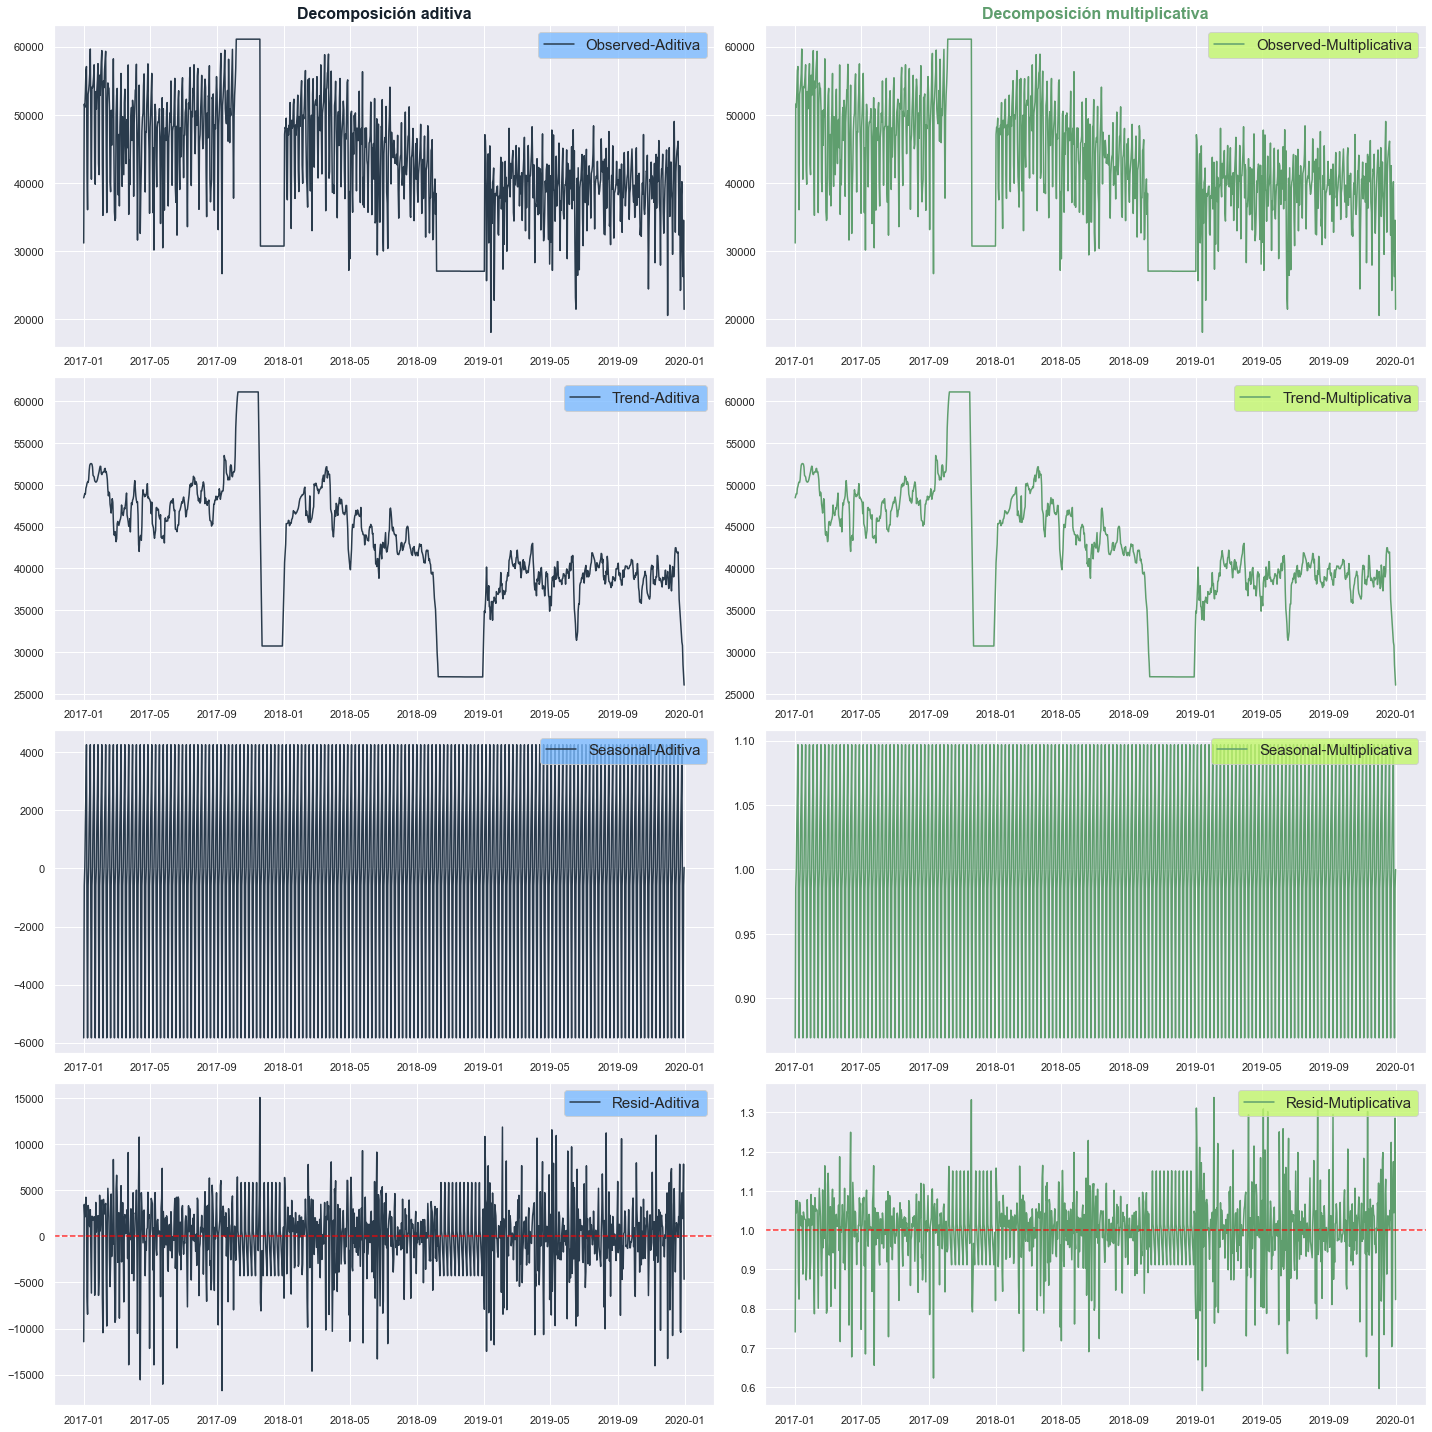

In [101]:
#Graficamos ambos casos para comparar

color_a='#2a3b4c'
color_m='#5f9e6e'

plt.figure(figsize=(20,20))
plt.subplot(421)
plt.title('Decomposición aditiva', fontweight='bold', fontsize=16, color='#15202b')
plt.plot(additive_result.observed, color=color_a, label= "Observed-Aditiva")
plt.legend(fontsize=15, facecolor= '#7cbbff', loc= 1)
plt.subplot(422)
plt.title('Decomposición multiplicativa', fontweight='bold', fontsize=16, color=color_m)
plt.plot(mult_result.observed, color=color_m, label= "Observed-Multiplicativa")
plt.legend(fontsize=15, facecolor= '#c4f76c', loc= 1)

plt.subplot(423)
plt.plot(additive_result.trend, color=color_a, label= "Trend-Aditiva")
plt.legend(fontsize=15, facecolor= '#7cbbff', loc= 1)
plt.subplot(424)
plt.plot(mult_result.trend, color=color_m, label= "Trend-Multiplicativa")
plt.legend(fontsize=15, facecolor= '#c4f76c', loc= 1)

plt.subplot(425)
plt.plot(additive_result.seasonal, color=color_a, label= "Seasonal-Aditiva")
plt.legend(fontsize=15, facecolor= '#7cbbff', loc= 1)
plt.subplot(426)
plt.plot(mult_result.seasonal, color=color_m, label= "Seasonal-Multiplicativa")
plt.legend(fontsize=15, facecolor= '#c4f76c', loc= 1)

plt.subplot(427)
plt.plot(additive_result.resid, color=color_a, label= "Resid-Aditiva")
plt.axhline(y=additive_result.resid.mean(), color='red', linestyle='--', alpha=0.8)
plt.legend(fontsize=15, facecolor= '#7cbbff', loc= 1)
plt.subplot(428)
plt.plot(mult_result.resid, color=color_m, label= "Resid-Mutiplicativa")
plt.axhline(y=mult_result.resid.mean(), color='red', linestyle='--', alpha=0.8)
plt.legend(fontsize=15, facecolor= '#c4f76c', loc= 1)

plt.tight_layout()
plt.show()


A primera vista, ambos modelos parecen ser similares.

La diferencia apreciable más importante a destacar es que los residuos del modelo aditivo tienen un comportamiento aleatorio con media 0, lo que nos puede indicar presencia de ruido blanco. Este comportamiento no ocurre en los residuos del modelo multiplicativo.

Para verificar si los datos observados son correctos y se acomodan a un comportamiento aditivo, se debería cumplir que: . Si es multiplicativo, entonces 

Un comportamiento Aditivo supone que las observaciones se generan como suma de las cuatro componentes

Comportamiento de la serie por rango horaio

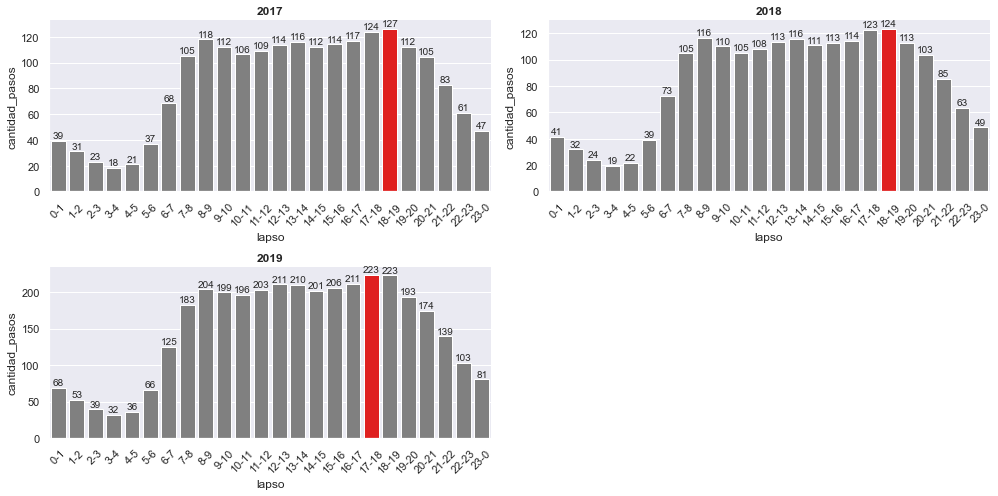

In [102]:
plt.figure(figsize=(14,7))
for idx,dataset in enumerate(datasets):
    pasos_horas=dataset.groupby(by=['hora_inicio','hora_fin']).agg('mean')[['cantidad_pasos']].reset_index()
    pasos_horas['hora_inicio']=pasos_horas['hora_inicio'].astype(str)
    pasos_horas['hora_fin']=pasos_horas['hora_fin'].astype(str)
    pasos_horas['lapso']= pasos_horas['hora_inicio']+'-'+pasos_horas['hora_fin']
    pasos_horas=pasos_horas.drop(columns=['hora_inicio','hora_fin']).set_index('lapso')
    plt.subplot(2,2,idx+1)
    pasos_hora_g=sns.barplot(x=pasos_horas.index,y='cantidad_pasos',data=pasos_horas,                           
                          palette=['grey' if (x < max(pasos_horas.cantidad_pasos)) else 'red' for x in pasos_horas.cantidad_pasos])
    plt.xticks(rotation=45,ha='center')    
    for p in pasos_hora_g.patches: 
        pasos_hora_g.annotate(format(p.get_height(), ',.0f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    plt.title(f'{2017+idx}',fontweight='bold')
    sns.despine()
plt.tight_layout()
plt.show()

Descomposicion Aditiva de la Media Semanal

In [103]:
result = seasonal_decompose(semanal_m.cantidad_pasos, model='additive')

In [104]:
result.trend

fecha
2017-01-01   NaN
2017-01-08   NaN
2017-01-15   NaN
2017-01-22   NaN
2017-01-29   NaN
              ..
2019-12-08   NaN
2019-12-15   NaN
2019-12-22   NaN
2019-12-29   NaN
2020-01-05   NaN
Freq: W-SUN, Name: trend, Length: 158, dtype: float64

In [105]:
result.seasonal

fecha
2017-01-01   -13174.040782
2017-01-08    -2581.671276
2017-01-15    -1631.915095
2017-01-22     -313.907540
2017-01-29      194.240125
                  ...     
2019-12-08   -13468.113584
2019-12-15   -13387.140370
2019-12-22   -13279.509875
2019-12-29   -13174.040782
2020-01-05    -2581.671276
Freq: W-SUN, Name: seasonal, Length: 158, dtype: float64

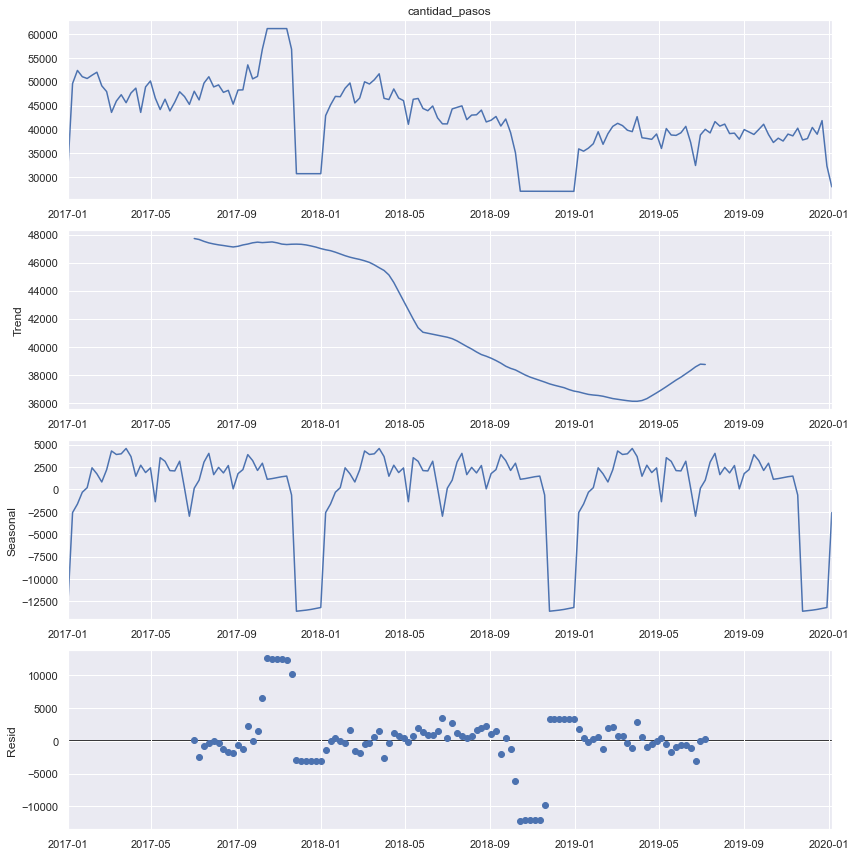

In [106]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

 El gráfico anterior muestra claramente que la cantidad de pasos es inestable, junto con su evidente estacionalidad, que es anual

1- En el primer gráfico vemos la serie tal como nos la presentan
2- Trend: vemos la tendencia de la serie, que ya hemos demostrado que es negativa
3- Seasonal: vemos la estacionalidad de la serie, que claramente es anual
4- Resid: vemos los residuas de la serie,se encuentran sin correlacion alguna y el promedio en general se encuentra fijo en 0 (cero), o sea denota Ruido Blanco. el ruido blanco es completamente aleatorio con una media de 0.

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


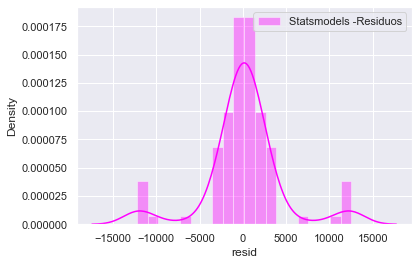

In [107]:
plt.figure(figsize = (6,4))
sns.distplot(result.resid, bins = 20, color='magenta', label="Statsmodels -Residuos")

plt.legend()
plt.show()

Observamos que los residuos tienen una distribucion normal 

AUTOCORRELACIÓN

In [108]:
from statsmodels.tsa.stattools import acf

In [109]:
nlags =  52*3
autocorr = acf(semanal_m.cantidad_pasos, nlags = nlags)

In [110]:
autocorr.shape

(157,)

Text(0.5, 0, 'lag')

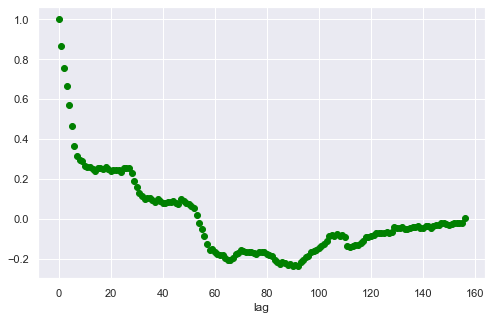

In [111]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr,color='green')
plt.xlabel('lag')

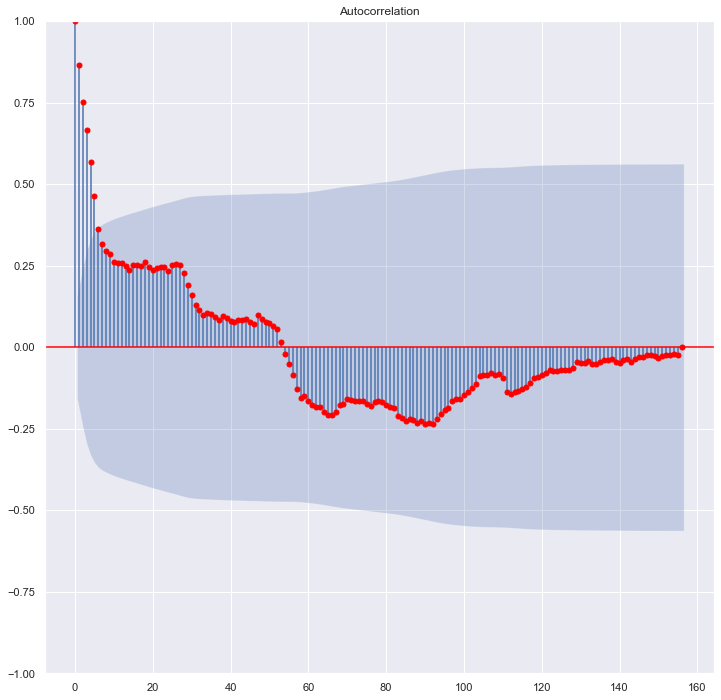

In [112]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(semanal_m.cantidad_pasos, lags = 52*3, color='red')
plt.show()

 La autocorrelación es la correlación de una serie con sus propios rezagos. Si una serie está significativamente autocorrelacionada, eso significa que los valores anteriores de la serie (rezagos) pueden ser útiles para predecir el valor actual.

Predicciones a Futuro
Ultimo Trimestre 2019

Modelos Benchmark
La metrica de Evaluacion elegida es RMSE dado el manejo de los valores atipicos que se ha realizado en el preprocesamiento de datos

In [113]:
from sklearn.metrics import mean_squared_error

In [114]:
# 3ª trimestre 2019
fecha_i='2019-07-01'
fecha_f='2019-09-30'
X= semanal_m [(semanal_m.index >=fecha_i)&(semanal_m.index <=fecha_f)]

# 4º trimestre 2019 = Ultimo trimestre  2019
fecha_i='2019-10-01'
fecha_f='2019-12-31'
y=semanal_m [(semanal_m.index >=fecha_i)&(semanal_m.index <=fecha_f)]

y_t=X.cantidad_pasos.rolling(window=1, center=True).mean()
b_rmse=np.sqrt(mean_squared_error(y, y_t))

---------------------------------
RMSE en Benchmark: 2999.8287232635116
---------------------------------


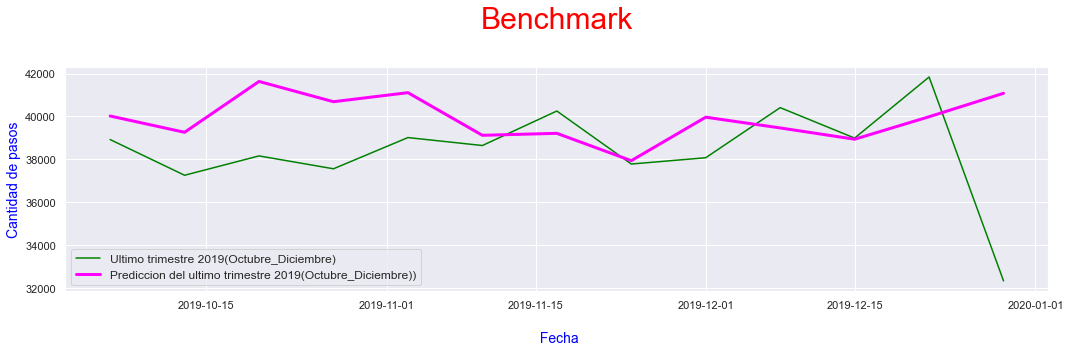

In [115]:
print('---------------------------------')
print(f'RMSE en Benchmark: {b_rmse}')
print('---------------------------------')

plt.figure(figsize=(15,5))
plt.plot(y.index, y.cantidad_pasos,color='green', label='Ultimo trimestre 2019(Octubre_Diciembre)')
plt.plot(y.index, y_t, lw=3, color='magenta',label='Prediccion del ultimo trimestre 2019(Octubre_Diciembre))')
plt.title ('Benchmark\n', color='red', fontsize=30)
plt.xlabel('\n Fecha', color='blue',fontsize=14)
plt.ylabel('Cantidad de pasos', color='blue',fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Preparando los datos

Realizamos una máscara para tomar semanas enteras, ya que al hacer un búsqueda por fuera del DS, vemos que la primera y la última son semanas incompletas

In [116]:
semanal_m=semanal_m[(semanal_m.index >='2017-01-08')&(semanal_m.index <='2019-12-29')]
semanal_m

,cantidad_pasos
fecha,
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
2017-02-05,51343.000000
...,...
2019-12-01,38079.285714
2019-12-08,40413.000000
2019-12-15,38994.285714


In [117]:
senial = semanal_m.cantidad_pasos
senial

fecha
2017-01-08    49601.714286
2017-01-15    52344.714286
2017-01-22    51030.714286
2017-01-29    50654.428571
2017-02-05    51343.000000
                  ...     
2019-12-01    38079.285714
2019-12-08    40413.000000
2019-12-15    38994.285714
2019-12-22    41840.142857
2019-12-29    32341.428571
Freq: W-SUN, Name: cantidad_pasos, Length: 156, dtype: float64

In [118]:
senial.shape

(156,)

En primer lugar, debemos definir cuántos valores hacia atrás tomaremos.

In [119]:
look_back = 12 # usamos 12 semanas de datos para predecir el valor siguiente

In [120]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(143, 12) (143,)


In [121]:
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [122]:
print(X)

[[49601.71428571 52344.71428571 51030.71428571 ... 45927.71428571
  47256.28571429 45583.28571429]
 [52344.71428571 51030.71428571 50654.42857143 ... 47256.28571429
  45583.28571429 47613.85714286]
 [51030.71428571 50654.42857143 51343.         ... 45583.28571429
  47613.85714286 48639.57142857]
 ...
 [38941.71428571 39989.57142857 41081.14285714 ... 40255.71428571
  37785.71428571 38079.28571429]
 [39989.57142857 41081.14285714 38926.14285714 ... 37785.71428571
  38079.28571429 40413.        ]
 [41081.14285714 38926.14285714 37262.85714286 ... 38079.28571429
  40413.         38994.28571429]]


In [123]:
print(y)

[47613.85714286 48639.57142857 43558.85714286 48889.28571429
 50135.14285714 46553.57142857 44153.14285714 46320.
 43864.85714286 45705.28571429 47878.14285714 46874.57142857
 45235.85714286 47985.71428571 46165.57142857 49681.42857143
 51022.28571429 48891.42857143 49309.14285714 47749.28571429
 48177.57142857 45283.85714286 48237.         48276.14285714
 53502.85714286 50571.28571429 51095.85714286 56786.71428571
 61099.         61099.         61099.         61099.
 61099.         56761.28571429 30735.         30735.
 30735.         30735.         30735.         30735.
 42891.71428571 45111.42857143 46908.42857143 46841.
 48610.71428571 49720.57142857 45533.28571429 46566.57142857
 49966.85714286 49500.85714286 50387.57142857 51637.85714286
 46506.42857143 46246.42857143 48465.         46557.71428571
 46022.         41067.14285714 46302.14285714 46472.
 44387.         43909.85714286 44898.71428571 42404.85714286
 41164.85714286 41151.71428571 44287.42857143 44619.28571429
 44931.    

In [124]:
# Hacemos el train/test split.
N_train = 143 - look_back # cantidad de instancias que vamos a usar para entrenar. look_back = 12 semanas 
N_test = 12  #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(131, 12) (131,)
(12, 12) (12,)


In [125]:
y_test = y[N_train:N_train+N_test]
print(y_test)

[38926.14285714 37262.85714286 38163.85714286 37564.28571429
 39018.42857143 38648.         40255.71428571 37785.71428571
 38079.28571429 40413.         38994.28571429 41840.14285714]


RandomForestRegressor

In [126]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor( random_state=42, n_jobs = -1)

In [127]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [128]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

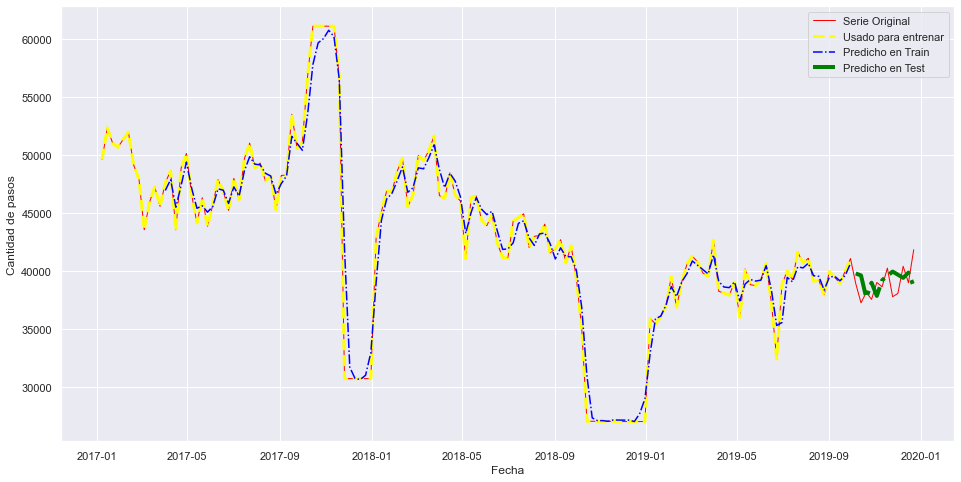

RMSE RFR en Train: 1498.6200983757176
RMSE RFR en Test: 1575.6873077904177


In [129]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',color='blue',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse =np.sqrt( mean_squared_error(y_train, y_train_pred))
print('RMSE RFR en Train:',rmse)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE RFR en Test:',rmse)

In [130]:
#Buscando los mejores hiperparámetros
from sklearn.model_selection import  GridSearchCV, TimeSeriesSplit
tss= TimeSeriesSplit(n_splits=2)

In [131]:
param_grid = {'n_estimators':[ 20, 50,100,200],
              'max_depth': [i for i in range(2,20)],
              'max_features': ['auto', 'sqrt', 'log2'], 
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4, 6]} 
rf_reg=RandomForestRegressor(random_state=42)
rf_gs =GridSearchCV(rf_reg, param_grid, scoring='neg_root_mean_squared_error', cv=tss,verbose=5,n_jobs=-1)

In [132]:
rf_gs.fit(X_train,y_train)

Fitting 2 folds for each of 2592 candidates, totalling 5184 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 100, 200]},
             scoring='neg_root_mean_squared_error', verbose=5)

In [144]:
pd.DataFrame(rf_gs.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
248,0.106986,0.001500,0.005996,0.001000,3,log2,1,10,20,"{'max_depth': 3, 'max_features': 'log2', 'min_...",-8323.574722,-4324.402043,-6323.988383,1999.586339,1
200,0.084205,0.002259,0.010496,0.001497,3,sqrt,1,10,20,"{'max_depth': 3, 'max_features': 'sqrt', 'min_...",-8323.574722,-4324.402043,-6323.988383,1999.586339,1
189,0.270832,0.004997,0.034477,0.018489,3,auto,6,10,50,"{'max_depth': 3, 'max_features': 'auto', 'min_...",-7827.220571,-4836.752011,-6331.986291,1495.234280,3
185,0.198378,0.016492,0.017487,0.003499,3,auto,6,5,50,"{'max_depth': 3, 'max_features': 'auto', 'min_...",-7827.220571,-4836.752011,-6331.986291,1495.234280,3
181,0.186381,0.005494,0.013491,0.002499,3,auto,6,2,50,"{'max_depth': 3, 'max_features': 'auto', 'min_...",-7827.220571,-4836.752011,-6331.986291,1495.234280,3


In [145]:
abs(rf_gs.best_score_)

6323.98838258704

In [146]:
rf_gs.best_params_

{'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 20}

In [147]:
#Aplicando los hiperparametros
rf_h = RandomForestRegressor(max_depth= 7,
                             max_features= 'auto',
                             n_estimators= 200, 
                             random_state=42,
                             min_samples_leaf=2,
                             min_samples_split= 2,
                             n_jobs = -1)

In [148]:
rf_h.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=2, n_estimators=200,
                      n_jobs=-1, random_state=42)

In [149]:
y_train_pred = rf_h.predict(X_train)
y_test_pred = rf_h.predict(X_test)

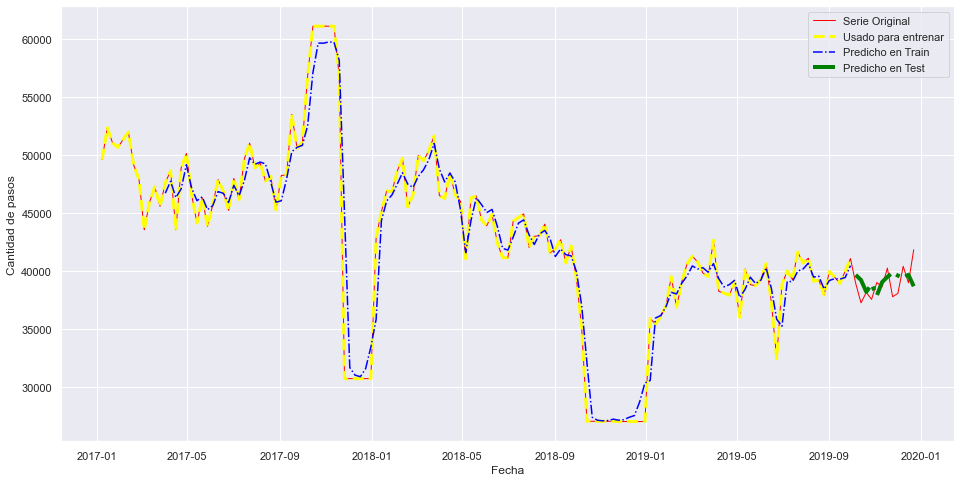

RMSE RFR en Train: 1981.1090002306928
RMSE RFR en Test: 1477.1964496450441


In [150]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',color='blue',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE RFR en Train:',rmse)

rmse =np.sqrt( mean_squared_error(y_test, y_test_pred))
print('RMSE RFR en Test:',rmse)

In [151]:
#Busqueda manual de Hiperparámetros
rf_h_1 = RandomForestRegressor(max_depth=5,
                             max_features= 'auto',
                             n_estimators=200, 
                             random_state=42,
                             min_samples_leaf=2,
                             min_samples_split= 4,
                             n_jobs = -1)

In [152]:
rf_h_1.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=4,
                      n_estimators=200, n_jobs=-1, random_state=42)

In [153]:
y_train_pred = rf_h_1.predict(X_train)
y_test_pred = rf_h_1.predict(X_test)

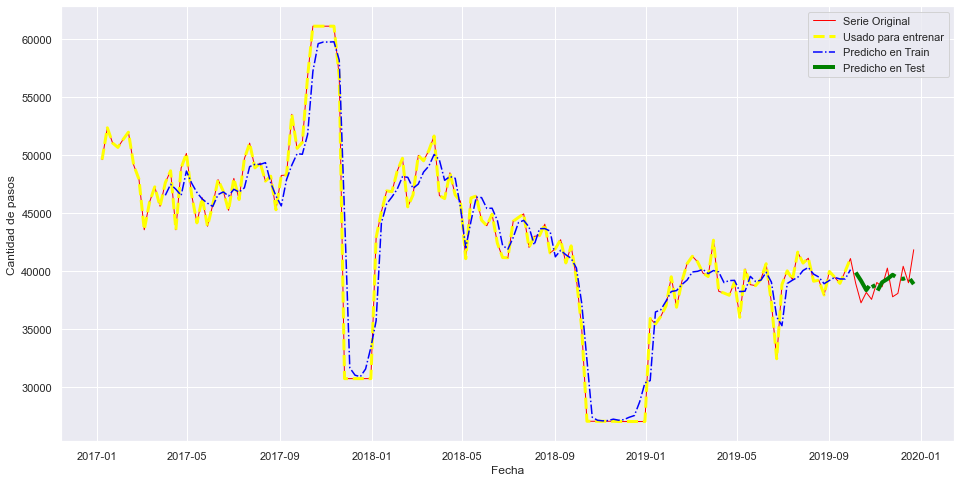

RMSE RFR en Train: 2162.6821010532162
RMSE RFR en Test: 1412.465812648056


In [154]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',color='blue',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE RFR en Train:',rmse)

rmse_rf =np.sqrt( mean_squared_error(y_test, y_test_pred))
print('RMSE RFR en Test:',rmse_rf)

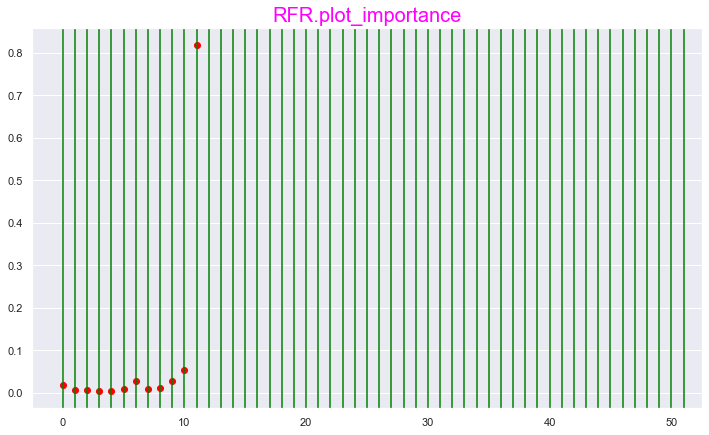

In [155]:
#Feature Importance del Modelo
plt.figure(figsize = (12,7))

plt.scatter(np.arange(rf_h_1.feature_importances_.size),rf_h_1.feature_importances_,color='red')
plt . title ( "RFR.plot_importance",color='magenta',size=20 ) 
for x in range(52):
    plt.axvline(x, linestyle ='-', color= 'green')
    
plt.show()

Si observamos la importancia de las características que devuelve, vemos que de las 12 semanas usadas para predecir, la semana Nº 12 es las mas relevante

In [156]:
#XGBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor
xgb=XGBRegressor(objective = 'reg:squarederror',random_state=42)


In [157]:
xgb.fit(X_train,y_train)
#entrenamos el modelo

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [158]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
#predecimos

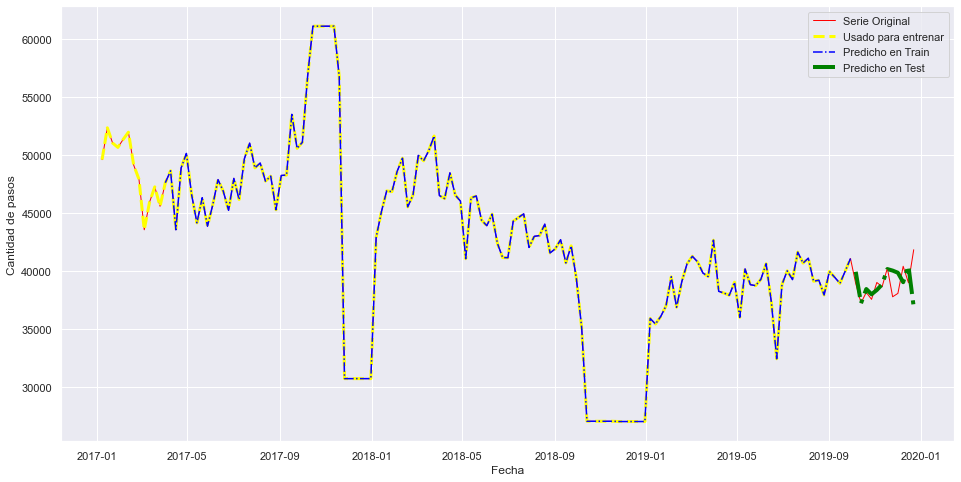

RMSE XGB en Train: 0.09200453267259379
RMSE XGB en Test: 1788.9413542571892


In [159]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',color='blue',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse =np.sqrt( mean_squared_error(y_train, y_train_pred))
print('RMSE XGB en Train:',rmse)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE XGB en Test:',rmse)

In [160]:
#Buscando los mejores hiperparametros
param_grid = {'nthread': [4],
              'objective': ['reg:squarederror'],
              'learning_rate': [0.1,0.2,0.3],
              'max_depth':[4,5,6,7],
              'min_child_weight': [1,2,3,4],
              'subsample':[0.5,0.7,0.8,0.9,1],
              'colsample_bytree':[0.5,0.7,1],
              'reg_lambda':[1,2,3],
              'n_estimators':[20,50,100,200]} 
xgb_reg=XGBRegressor(random_state=42)
xgb_gs=GridSearchCV(xgb_reg, param_grid, scoring='neg_root_mean_squared_error', cv=tss,verbose=5,n_jobs=-1)

In [161]:
xgb_gs.fit(X_train,y_train)

Fitting 2 folds for each of 8640 candidates, totalling 17280 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=...
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7],
                         'min_child_w

In [162]:
pd.DataFrame(xgb_gs.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_nthread,param_objective,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
8450,0.313304,0.041474,0.006997,1.192093e-07,1,0.3,7,1,200,4,reg:squarederror,2,0.5,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",-7058.576595,-2881.089492,-4969.833044,2088.743552,1
8435,0.153901,0.020987,0.005996,2.384186e-07,1,0.3,7,1,100,4,reg:squarederror,2,0.5,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",-7063.678566,-2878.591669,-4971.135118,2092.543449,2
8420,0.081449,0.010493,0.006995,1.907349e-06,1,0.3,7,1,50,4,reg:squarederror,2,0.5,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",-7164.838925,-2861.497170,-5013.168048,2151.670877,3
7955,0.134413,0.014490,0.006496,4.996061e-04,1,0.3,5,1,100,4,reg:squarederror,2,0.5,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",-7324.987834,-2751.157296,-5038.072565,2286.915269,4
7970,0.261338,0.029482,0.007496,5.000830e-04,1,0.3,5,1,200,4,reg:squarederror,2,0.5,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",-7328.753307,-2749.369954,-5039.061630,2289.691676,5


In [163]:
abs(xgb_gs.best_score_)

4969.83304362485

In [164]:
xgb_gs.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.3,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 200,
 'nthread': 4,
 'objective': 'reg:squarederror',
 'reg_lambda': 2,
 'subsample': 0.5}

In [165]:
#Aplicando los hiperparametros
xgb_h=XGBRegressor(colsample_bytree=1,
                   learning_rate= 0.2,
                   max_depth= 5,
                   min_child_weight= 3,
                   n_estimators= 20,
                   nthread= 4,
                   objective= 'reg:squarederror',
                   n_jobs = -1,
                   random_state=42,
                   reg_lambda= 1,
                   subsample= 0.7)

In [166]:
xgb_h.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=-1, nthread=4, num_parallel_tree=1,
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [167]:
y_train_pred = xgb_h.predict(X_train)
y_test_pred = xgb_h.predict(X_test)

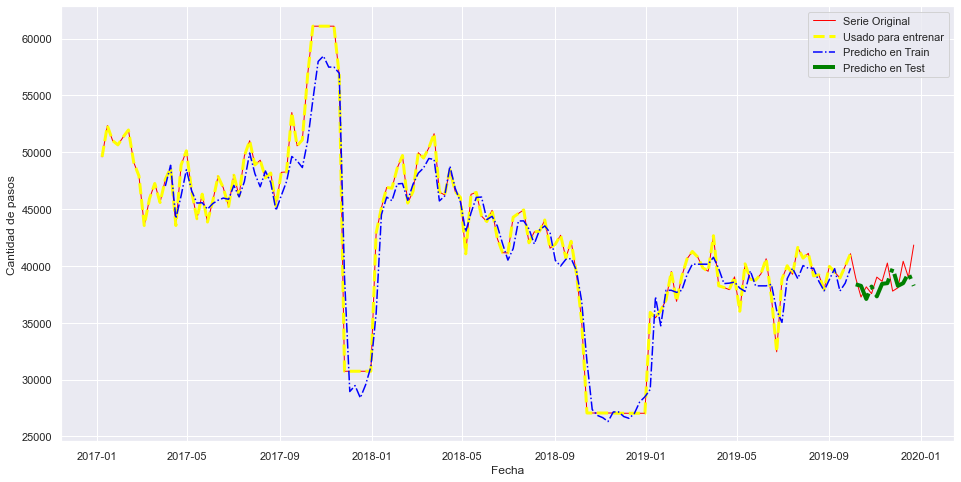

RMSE XGB en Train: 2011.9693307706211
RMSE XGB en Test: 1572.3317862407355


In [168]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', lw = 3,color='yellow',label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',color='blue',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'-.',color='green', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('RMSE XGB en Train:',rmse)

rmse =np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE XGB en Test:',rmse)

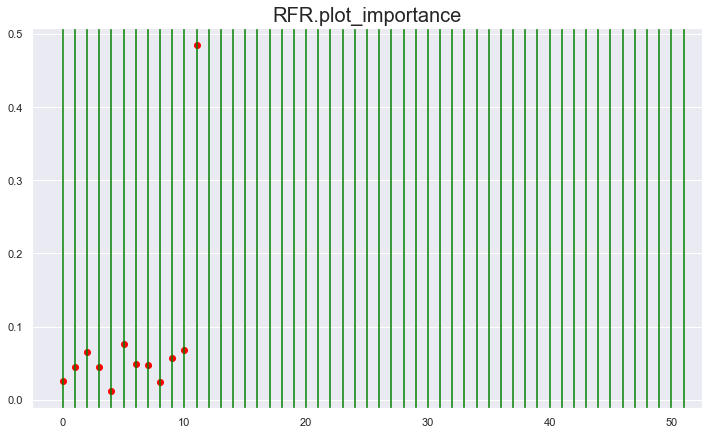

In [169]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(xgb_h.feature_importances_.size),xgb_h.feature_importances_,color='red')
plt . title ( "RFR.plot_importance", size=20 ) 
for x in range(52):
    plt.axvline(x, linestyle ='-', color= 'green')
plt.show()

Si observamos la importancia de las características que devuelve XGB, vemos que de las 12 semanas usadas para predecir, la semana Nº 12 es las mas relevante

De todos los modelos , el que mejor predice es el Hiperparametro-RandomForestRegressor con un RMSE TEST =1477,14

In [172]:
#PREDICCIÓN AÑO 2020
data_2020 = pd.read_csv(r'flujo-vehicular-2020.csv', sep =',')

In [173]:
data_2020 = pd.read_csv(r"C:\Users\Cande\Desktop\DOCUMENTACION PARA ENVIAR A GABRIEL\DATASCIENCE\flujo-vehicular-2020.csv", sep =',')
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   periodo         1048575 non-null  float64
 1   fecha           1048575 non-null  object 
 2   mes             1048575 non-null  object 
 3   dia             1048575 non-null  object 
 4   dia_fecha       1048575 non-null  float64
 5   hora_inicio     1048575 non-null  float64
 6   hora_fin        1048575 non-null  float64
 7   estacion        1048575 non-null  object 
 8   tipo_vehiculo   1048575 non-null  object 
 9   forma_pago      1048575 non-null  object 
 10  observacion     1048575 non-null  object 
 11  sentido         1048575 non-null  object 
 12  cantidad_pasos  1048575 non-null  float64
dtypes: float64(5), object(8)
memory usage: 104.0+ MB


In [174]:
data_2020.forma_pago.replace({'Efectivo':'EFECTIVO','Tarjeta Magnética':'TELEPASE','Tag':'TELEPASE'},
                             inplace=True)

In [175]:
data_2020.estacion.replace({'ALBERDI':'Alberdi','AVELLANEDA':'Avellaneda','ILLIA':'Illia','RETIRO':'Retiro',
                            'SARMIENTO':'Sarmiento','SALGUERO':'Salguero','DELLEPIANE LINIERSLEPIANE CENTRO':
                           'Dellepiane Centro','DELLEPIANE LINIERS':'Dellepiane Liniers'},inplace=True)

In [176]:
data_2020.tipo_vehiculo.replace({'Pesado 2 Ejes':'Pesado','Pesado 3 Ejes':'Pesado','Pesado 4 Ejes':'Pesado',
                                 'Pesado 5 Ejes':'Pesado','Pesados 6 Ejes':'Pesado'})

0          Auto
1          Auto
2          Auto
3          Auto
4          Auto
           ... 
1048570    Auto
1048571    Auto
1048572    Auto
1048573    Auto
1048574    Auto
Name: tipo_vehiculo, Length: 1048575, dtype: object

In [177]:
data_2020.drop(columns=['mes','dia','observacion','dia_fecha'], inplace = True)

In [178]:
#Trabajaremos con Illia y pago en efectivo.
#Unimos los 4 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2020,data_2019, data_2018, data_2017])
#Nos quedamos solamente con la estación Illia y la forma de pago telepase
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'TELEPASE')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio'], inplace = True)

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)

#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario_t = dataset.resample('D', on = 'fecha').sum()
print(diario_t.shape)
diario_t.head()

(1272, 1)


,cantidad_pasos
fecha,
2017-01-01,12326.0
2017-01-02,35621.0
2017-01-03,39390.0
2017-01-04,40294.0
2017-01-05,41373.0


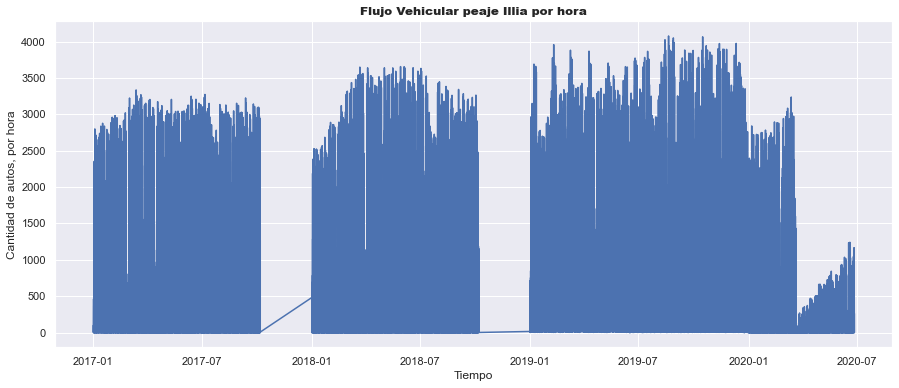

In [179]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.title ('Flujo Vehicular peaje Illia por hora', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [180]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1272, 1)


,cantidad_pasos
fecha,
2017-01-01,12326.0
2017-01-02,35621.0
2017-01-03,39390.0
2017-01-04,40294.0
2017-01-05,41373.0


In [181]:
diario.cantidad_pasos.isnull().sum()
#no hay valores nulos

0

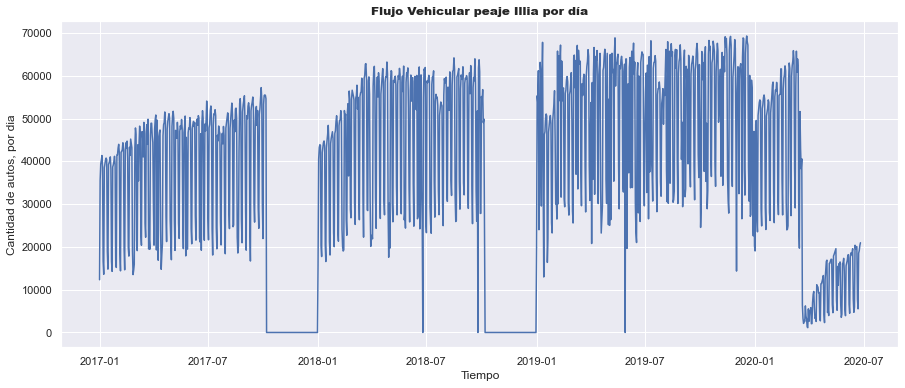

In [182]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title ('Flujo Vehicular peaje Illia por día', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [184]:
diario.tail()

,cantidad_pasos
fecha,
2020-06-21,5522.0
2020-06-22,18530.0
2020-06-23,19143.0
2020-06-24,20338.0
2020-06-25,20986.0


In [185]:
look_back = 90*1 # usamos x días de datos para predecir el valor siguiente

In [186]:
N = diario.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1181, 90) (1181,)


In [187]:
N-365-1

906

In [188]:
for i in range(X.shape[0]):
    X[i,:] = diario.values[i:i+look_back].ravel()
    y[i] = diario.values[i+look_back]

In [189]:
N_train = 2*365 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 1*365 # cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(640, 90) (640,)
(365, 90) (365,)


In [190]:
N_total

1005

Modelo Benchmark 2020

In [191]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

In [192]:
y_test_pred_benchmark.shape

(365,)

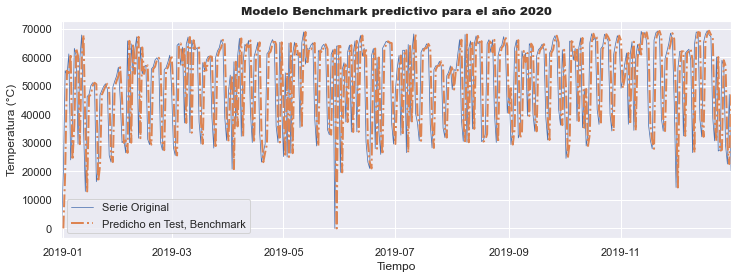

In [193]:
plt.figure(figsize=(12,4))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(diario.index[N_train+look_back-1], diario.index[length_total-1])
plt.title ('Modelo Benchmark predictivo para el año 2020', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

In [209]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

In [210]:
from sklearn.metrics import mean_squared_error
rmse =np.sqrt( mean_squared_error(y_train, y_train_pred))
print('RMSE RFR en Train:',rmse)

RMSE RFR en Train: 2952.103743933881


In [211]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 4).fit(X_train,y_train)

In [205]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [206]:
diario.index[N_train+look_back: length_total].shape

(365,)

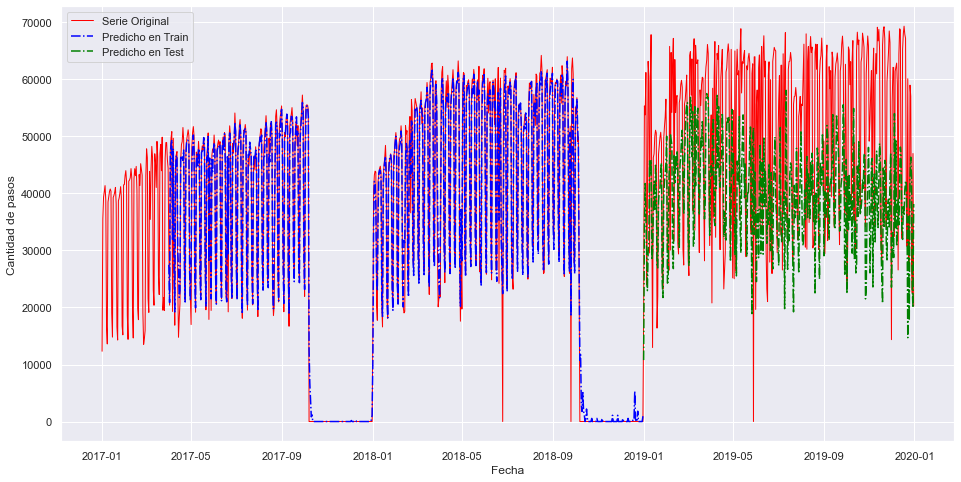

RMSE RFR en Train: 2952.103743933881
RMSE RFR en Test: 19796.855085907508


In [207]:
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',color='blue',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total], y_test_pred,'-.',color='green', label = 'Predicho en Test')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.show()
rmse =np.sqrt( mean_squared_error(y_train, y_train_pred))
print('RMSE RFR en Train:',rmse)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print('RMSE RFR en Test:',rmse)

Conclusión: Cuando predecimos el año 2020, debemos tener en cuenta que en Argentina hubo cuarentena estricta por varios meses, por lo tanto esto reduce el transito y se ve que aumenta el pago por Telepasey disminuye en Efectivo.